-----
# **Problem Statement: Predicting Customer Purchase Value – MLP Project**
-----

## **Executive Summary**

This project focuses on predicting the `purchaseValue` of customers based on their multi-session behavioral data across various digital touchpoints. The dataset derived from a large-scale digital commerce platform includes detailed user interaction logs such as browser activity, device specifications, session characteristics, marketing channels and geographic data.

Using the ML Life Cycle, I applied extensive data preprocessing, feature engineering and machine learning modeling techniques to estimate the monetary value of user sessions. Multiple regression algorithms-including XGBoost, LightGBM, SVM, Ridge, Lasso, Random Forest were evaluated using the R² score with a target benchmark of 0.45.

Key challenges included handling missing values, managing high-cardinality categorical features and addressing skewed target distribution. I implemented robust preprocessing pipelines with `ColumnTransformer`, log-transformed the sessionNumber and employed early stopping and cross-validation to prevent overfitting.

The final model pipeline serialized using `pickle`, which demonstrates strong predictive power and can be integrated into real-world systems for campaign targeting, user segmentation and marketing ROI analysis. Future work may explore deeper feature interactions, model explainability (via SHAP) and AutoML for scalable performance tuning.

Overall, this project lays a strong foundation for data-driven marketing strategy optimization by bridging raw behavioral data with predictive analytics.

-----

## **Project Overview**

This project aims to predict the **purchase value** of customers by analyzing their session-wise interactions across digital touchpoints such as devices, traffic sources and geographical details. The task involves performing **end-to-end machine learning** including **data preprocessing, EDA, feature engineering, PCA, modeling, comparison of models and evaluation**.

By identifying patterns in user behavior and session metadata, the model can help digital marketers improve campaign strategies, personalize experiences and ultimately increase conversion rates.

---

## **Objective**

- Predict the `purchaseValue` (The amount spent by the customer during the session).  
- Use **R² Score** as the primary evaluation metric.  
- Target Score: **R² >= 0.45**

---

## **Business Context**

Digital commerce platforms gather vast amounts of session-level data. Predicting purchase intent from this data allows businesses to:

- Optimize user acquisition and marketing spend.  
- Personalize content based on engagement level.  
- Improve sales forecasting and product recommendations.  

---

## **Dataset Description**

Each row represents a **unique session** for a user. The dataset comprises multiple types of features:

### 1. User Behavior & Engagement
- `totalHits`: Total number of hits/interactions during the session.
- `pageViews`: Number of pages viewed in the session.
- `totals.bounces`: Number of single-page sessions.
- `new_visits`: Indicator of new vs returning visitors.
- `totals.visits`: Total number of visits.`

### 2. Device & Technical Attributes
- `deviceType`: Type of device (desktop, mobile, tablet).
- `browser`: Browser used for the session.
- `os`: Operating system of the device.
- `screenSize`: Screen resolution category.
- `device.browserSize`: device specifications.
- `device.language`: device specifications.

### 3. Traffic & Marketing Attribution
- `userChannel`: Primary channel through which user arrived.
- `trafficSource`: Detailed source information.
- `trafficSource.medium`: Marketing medium (organic, cpc, referral, etc.).
- `trafficSource.keyword`: Search keywords used.
- `trafficSource.campaign`: Marketing campaign information.

### 4. Geographic Data
- `geoNetwork.city`: City of the user.
- `locationCountry`: Country of origin.
- `geoNetwork.continent`: Continental region.
- `geoNetwork.subContinent`: Sub-continental region.
- `geoNetwork.metro`: Metropolitan area.

### 5. Session & Temporal Metadata
- `sessionId`: Unique session identifier.
- `userId`: Unique user identifier.
- `sessionNumber`: Sequential session number for the user.
- `sessionStart`: Timestamp of session start.

---

## **Machine Learning Lifecycle & Data Pipeline**

### 1. Business Understanding
   - Understand the problem and KPIs from a marketing performance perspective.
   - Defined the problem as a **regression task** to predict `purchaseValue` from session data.

### 2. Data Understanding & EDA
   - Performed **initial data inspection** to assess shape, structure, data types, skewness and missing values.
   - Used **descriptive statistics** and visualizations (histograms, bar charts, correlation heatmaps) to understand feature behavior and distributions.
   - Examined **target variable distribution** and outliers.

### 3. Data Preparation  
   - **Handled missing values** using appropriate strategies (imputing mean,mode and dropping irrelevant columns and duplicate rows).
   - **Encoded categorical variables** using Label Encoding.
   - **Scaled numerical features** using StandardScaler.
   - Applied **log transformation** on `purchaseValue` and `sessionNumber` to reduce skewness and stabilize variance.

### 4. Feature Engineering & Extraction 
   - Extracted **temporal features** from `sessionStart` (day of week,hour,weekend,quarter, etc).
   - Created meaningful aggregates and flags (is_new_visitor,isGcdId,is_adPage,is_Bounce,etc).
   - Removed redundant or low-variance features.
   - Used correlation and feature importance to refine input space.


### 5. Modeling  
   - Trained and compared **multiple regression algorithms**:
       - Linear Regression, Ridge, Lasso.
       - Tree-based models: XGBoost, LightGBM, Random Forest.
       - MLP Regressor (Neural Network).
   - Used **cross-validation** to ensure generalization and robustness.
   - Tracked model performance on validation set using **R² score**.

### 6. Hyperparameter Tuning  
   - Applied `RandomizedSearchCV` for tuning parameters like:
       - Learning rate, max depth, number of estimators (for tree models).
   - Tuned pipelines with early stopping and validation splits.

### 7. Model Evaluation  
   - Compare at least 3 top models.  
   - Evaluated models using **R² Score** on training and validation sets.
   - Analyzed residuals, error distributions and overfitting trends.
   - Compared models based on performance and interpretability.

### 8. Deployment (Final Submission)  
   - Save the best model using `pickle`  
   - Submit predictions with best-performing model on training and validation data
   - Prepared and exported `submission.csv` with predicted `purchaseValue`.
   - Documented findings, challenges and future recommendations.
----

## **Challenges Faced**

### 1. Data Quality and Missing Values
   - Numerous features such as `trafficSource.keyword`, `geoNetwork.city` and `device.browserSize` had missing or placeholder values like `'not available'`.
   - Handling such inconsistencies was critical to avoid biased or failed model training.

### 2. High Cardinality Categorical Features
   - Features like `geoNetwork.city`, `device.language` and `trafficSource.campaign` had hundreds of unique values.
   - One-hot encoding increased dimensionality, introducing noise and computational overhead.

### 3. Skewed Target Variable
   - `purchaseValue` was heavily right-skewed with a large number of sessions having zero or near-zero purchases.
   - This challenged model stability and required log transformation to normalize variance.

### 4. Data Imbalance
   - Majority of sessions resulted in low purchase values leading to imbalance in the regression target.
   - Traditional models underperformed without appropriate transformations or robust algorithms.

### 5. Model Complexity and Overfitting
   - Tree-based models like XGBoost and LightGBM performed well but were prone to overfitting on noisy features.
   - Careful hyperparameter tuning and early stopping were necessary.

### 6. Pipeline Design
   - Preprocessing involved a mix of scaling, encoding and imputation, making the pipeline complex.
   - Custom ColumnTransformers were used to handle different data types effectively.

---

## **Future Recommendations**

### 1. Enhanced Feature Engineering
   - Derive new features such as:
     - Time-based variables from `sessionStart` (hour of day, weekday)
     - Ratios (Ex- pageViews/hits), bounce rate flags
     - Group-based statistics (avg purchase per country or channel)

### 2. Dimensionality Reduction
   - Apply PCA or feature importance-based selection (using SHAP) to mitigate high cardinality and reduce noise.

### 3. Handling Rare Categories
   - Group infrequent categorical labels into an “none” category to reduce dimensionality and overfitting risk.

### 4. Advanced Modeling Techniques
   - Explore model stacking (combining Linear, Tree-based and SVR models).
   - Integrate AutoML or neural networks for performance benchmarking.
   - Can apply zero-inflated-regressor (sklearn.meta)

### 5. Robust Evaluation
   - Implement k-fold cross-validation to ensure generalization.
   - Complement R² with RMSE/MAE for better understanding of absolute error margins.

### 6. Target Transformation
   - Apply log1p or Box-Cox transformations for better model fit and stability.

### 7. Interpretability and Explainability
   - Use SHAP values or LIME to understand and communicate key drivers of purchase behavior.

### 8. Deployment Readiness
   - Store complete pipelines using `pickle` or `joblib`.
   - Prepare scripts for inference, postprocessing and model versioning for production integration.

---


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


#   **1. Milestone 1: EDA, Preprocessing, and Baseline Model**  #


In [2]:
# IMPORTS Libraries
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Regression Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Set random seed for reproducibility
np.random.seed(42)

##  **1.1 Dummy Model Submission**  ##


In [3]:
# from sklearn.dummy import DummyRegressor

# df_train_engage2Value = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
# print(df_train_engage2Value.head())
# x_train_engage2Value = df_train_engage2Value.drop('purchaseValue',axis=1)
# y_train_engage2Value = df_train_engage2Value['purchaseValue']

# DummyModel = DummyRegressor().fit(x_train_engage2Value,y_train_engage2Value)
# x_test_engage2Value = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
# print(x_test_engage2Value.head())

# y_test_engage2Value_pred = DummyModel.predict(x_test_engage2Value)
# submission_data = pd.DataFrame({"id":range(0,x_test_engage2Value.shape[0]),'purchaseValue':y_test_engage2Value_pred})
# submission_data.to_csv("submission.csv",index = False)

##    **1.2 Train Data EDA**    ##

In [4]:
# Read Train Data
train_dataset = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
print("Train Dataset Shape:\t",train_dataset.shape)
# Display dataset info
print("-------------------Training Dataset Info-------------------\n")
print(train_dataset.info())
print("-------------------Missing values in the train dataset-------------------\n")
missing_train_data=train_dataset.isnull().sum()
print(missing_train_data)
print("-------------------Train Dataset Descriptive Statistics-------------------\n")
print(train_dataset.describe())

Train Dataset Shape:	 (116023, 52)
-------------------Training Dataset Info-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickIn

##      **1.2.1 Insights**       ##
-----

**General Dataset Overview:**  
- **Rows:** 116,023.  
- **Columns:** 52.  
- **Target Variable:** `purchaseValue` *(float64)*.

**Target Variable Analysis (`purchaseValue`):**  
- **Mean:** 26.56 million.  
- **Std Dev:** Very high (~ 205 million) -> *Highly skewed*.  
- **Median (50%):** 0.0 -> *Most users do not purchase*.  
- **Max:** 23.1 billion -> *Presence of extreme outliers*.  

**Missing Values Summary:**  
- `trafficSource.adContent`, `adwordsClickInfo.*`: Over 96% missing -> drop .  
- `trafficSource.keyword`, `isTrueDirect`: Around 60% missing -> sparse/binary.  
- `totals.bounces`, `new_visits`: 40–70% missing -> impute with 0 or mode.  
- `pageViews`: Less than 0.01% missing -> simple imputation suffices.

**Feature Types:**  
- **Categorical:** 37 features *(mostly object type)*.  
- **Numeric:** 14 features *(5 floats, 9 ints)*.  
- **Boolean:** 1 (`device.isMobile`).  

**Useful Numeric Features:**  
- `totalHits`, `pageViews`, `totals.visits`: *Correlated with user activity*.  
- `sessionNumber`, `sessionStart`, `date`: *Temporal feature derivation possible*.  
- `gclIdPresent`: *Sparse but binary -> useful for ad segmentatio.

**Suspicious or Constant Features:**  
- `totals.visits` is always 1 -> *Drop*.  
- `locationZone` is always 8 -> *Drop*.  
- `totals.bounces`, `new_visits` have only 1 unique non-null value -> *Consider dropping*.

**High Cardinality Columns:**  
- `sessionId`, `userId`, `geoNetwork.networkLocation`, `trafficSource.keyword`, `device.browserVersion`  
*Problematic for tree models or OneHotEncoding -> Consider:*
- Dropping  
- **Hashing**
- **Target/Mean Encoding**

**Imbalance and Sparsity in Features:**  
- Many features are **sparse** or have rare categories.  

**Target Leakage Check:**  
- No immediate red flags detected.  
- Still ensure:  
  - No future info leaks from session-based fields (`sessionId`, `sessionStartTime`).
 
**Action:**  
- Drop columns with >90% missing unless domain knowledge supports them.  
- Impute partially missing values (`pageViews`, `new_visits`).  
- Use **missingness flags** for potentially informative columns.
- *Preprocessing must include:*  
    - Encoding (OneHot/ Target encoding/ label encoding).  
    - Scaling for numeric features.  
    - Missing value handling.



##      **1.3 Test Data EDA**       ##

In [5]:
# Read Test Data
test_dataset = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
print("Test Dataset Shape:\t",test_dataset.shape)
# Display dataset info
print("-------------------Test Dataset Info-------------------\n")
print(test_dataset.info())
print("-------------------Missing values in the test dataset-------------------\n")
print(test_dataset.isnull().sum())
print("-------------------Test Dataset Descriptive Statistics-------------------\n")
print(test_dataset.describe())

Test Dataset Shape:	 (29006, 51)
-------------------Test Dataset Info-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               

##    **1.4 Dropping Unnecessary Columns**      ##

In [6]:
##--------- Detection of Unnecessary Columns ---------##
categorical_cols = train_dataset.select_dtypes(include=['object']).columns
numerical_cols = train_dataset.select_dtypes(include=['float64','int64']).columns
print(f"Total No of Numeric Col :{len(numerical_cols)} And Numerical columns in the dataset: {list(numerical_cols)}")
print(f"Total No of Categorical Col :{len(categorical_cols)} And Categorical columns in the dataset: {list(categorical_cols)}")

## Find Single Value Conatins Columns
single_value_drop_col=[]
for col in train_dataset.columns:
    if train_dataset[col].nunique()<2:
        print(f"\n{col}:")
        print(train_dataset[col].unique())
        single_value_drop_col.append(col)
    elif  train_dataset[col].nunique()>=3   and train_dataset[col].nunique()<10:
        pass

## Missing Values Percentage Calculation        
shape=train_dataset.shape[0]
missing_drop_col=[]
for i in missing_train_data:
    if i!=0 and i/shape>0.70: #Put Threshhold 70%
        print(f"Blank Vaules Columns are -> {missing_train_data[missing_train_data==i].index[0]} = {i/shape}")
        missing_drop_col.append(missing_train_data[missing_train_data==i].index[0])

missing_drop_col=list(set(missing_drop_col))
drop_cols=single_value_drop_col+missing_drop_col
print("single_value_drop_col:\t",single_value_drop_col)
print("missing_drop_col:\t",missing_drop_col)
print("All Dropping Columns:\t",drop_cols)

# Remove Single Value columns and Missing data with >70%
train_dataset = train_dataset.drop(columns=[col for col in drop_cols if col in train_dataset.columns])
test_dataset = test_dataset.drop(columns=[col for col in drop_cols if col in test_dataset.columns])
print("Train Dataset Shape after dropping single value, >0.50 missing value, idntifier:\t",train_dataset.shape)
print("Test Dataset Shape after dropping single value, >0.50 missing value, idntifier:\t",test_dataset.shape)

# Convert Boolean Values to Int
bool_cols_train = train_dataset.select_dtypes(include='bool').columns
train_dataset[bool_cols_train] = train_dataset[bool_cols_train].astype(int)
bool_cols_test = test_dataset.select_dtypes(include='bool').columns
test_dataset[bool_cols_test] = test_dataset[bool_cols_test].astype(int)

Total No of Numeric Col :14 And Numerical columns in the dataset: ['purchaseValue', 'userId', 'gclIdPresent', 'sessionNumber', 'totals.visits', 'sessionId', 'trafficSource.adwordsClickInfo.page', 'pageViews', 'locationZone', 'totals.bounces', 'date', 'totalHits', 'sessionStart', 'new_visits']
Total No of Categorical Col :37 And Categorical columns in the dataset: ['trafficSource.isTrueDirect', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSourc

## *1.4.1 Insights* ##
----
**Missing & Low-Variance Features Handling:**
- Dropped features with **>70% missing values**:  
  - `trafficSource.adwordsClickInfo.slot`, `trafficSource.adContent`
- Dropped features with **only a single unique value**:  
  - Includes `totals.visits`, `totals.bounces`, `new_visits`, `trafficSource.isTrueDirect`, etc.
- Final columns dropped: 23 in total.

**Final Resulting Dataset Shapes After Dropping Columns:**
- Train: (116,023 rows × 29 columns).  
- Test: (29,006 rows × 28 columns).



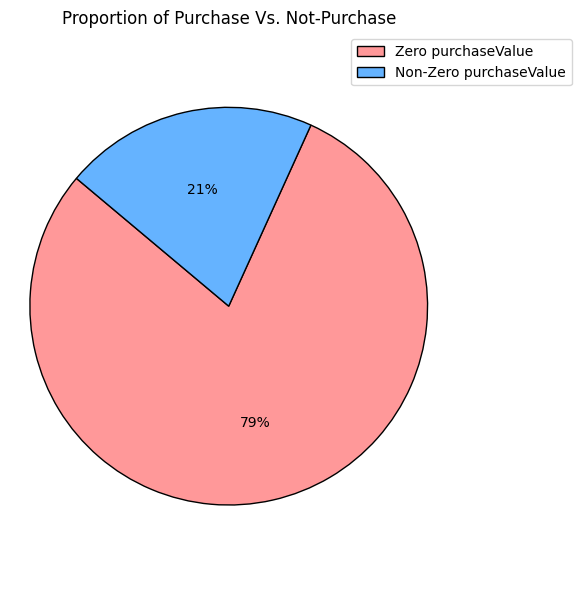

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


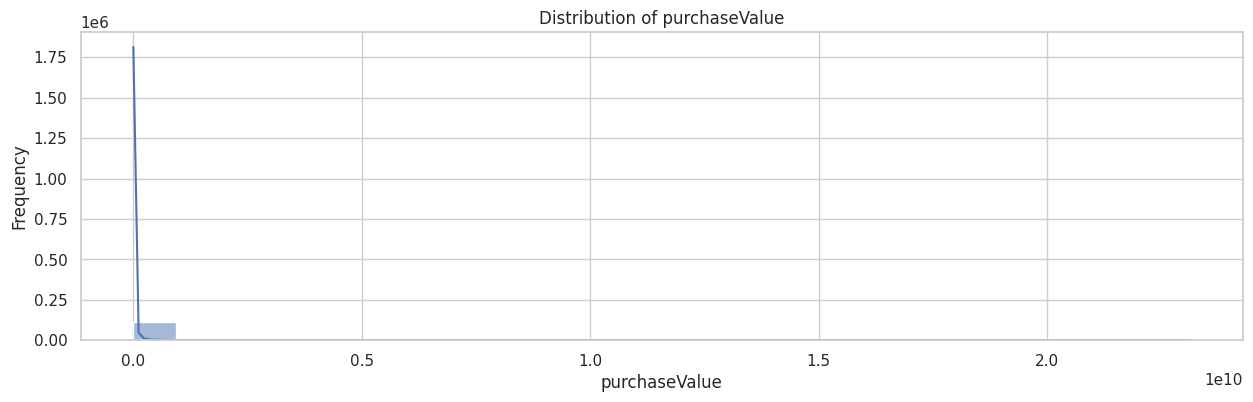

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


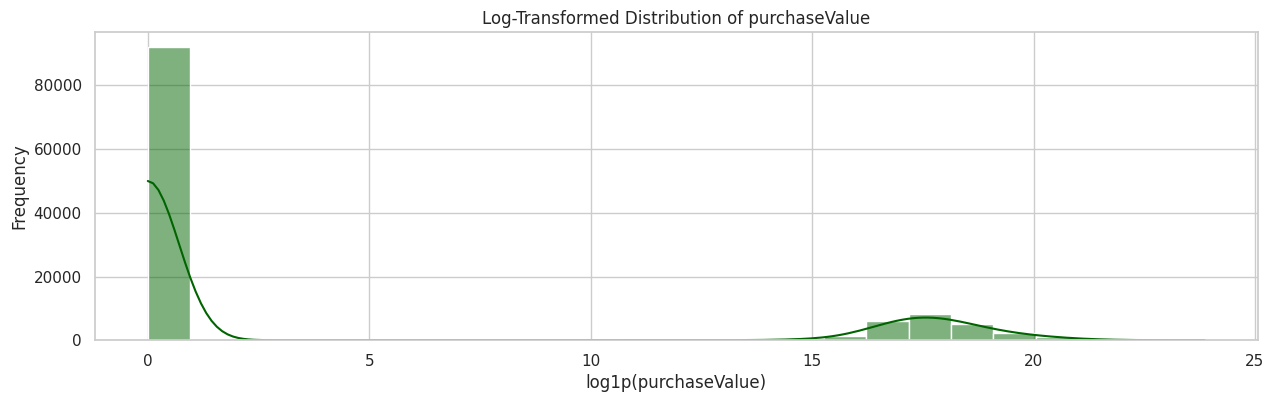

In [7]:
# Distribution of purchaseValue
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


##--------- Frequency of zero and non-zero vaules in purchaseValue ---------##
# Labels and data
labels = ['Zero purchaseValue', 'Non-Zero purchaseValue']
sizes = [(train_dataset['purchaseValue'] == 0).sum(), (train_dataset['purchaseValue'] != 0).sum()]

# Plot pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(sizes,labels=None,colors=['#ff9899', '#65b3ff'],autopct='%1.0f%%',startangle=140,wedgeprops={'edgecolor': 'black'})
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1.3, 1))
plt.title('Proportion of Purchase Vs. Not-Purchase')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()

##--------- Distribution of purchaseValue  ---------##
sns.set(style="whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.figure(figsize=(15, 4))
sns.histplot(train_dataset['purchaseValue'], bins=25, kde=True)
plt.title('Distribution of purchaseValue')
plt.xlabel('purchaseValue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##--------- Log-transformed distribution ---------##
plt.figure(figsize=(15, 4))
sns.histplot(np.log1p(train_dataset['purchaseValue']), bins=25, kde=True, color='darkgreen')
plt.title('Log-Transformed Distribution of purchaseValue')
plt.xlabel('log1p(purchaseValue)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## *1.4.2 Insights* ##
-----
**Skewness:** 
- Insights from visualizations: purchaseValue is **right-skewed**, suggesting a log transformation
     
**Distribution:**
- log transformation of purchaseValue is a **bimodal distribution**, indicating two different kinds of entries:
    - **Zero purchaseValue(very large spike near 0)**: Possibly users who browsed but didn't buy.
    - **Non-zero purchaseValue(smaller peak between ~ 15 and 20)** - Actual purchase records.
                
**purchaseValue Frequency Data:**
- From Piechart, we can observe around **79%** user did not purchase(zero) at all, only **21%** user purchased(non-zero).


##    **1.5 Univariate Analysis for Numerical Data**    ##


Col:purchaseValue	 Skew :53.9


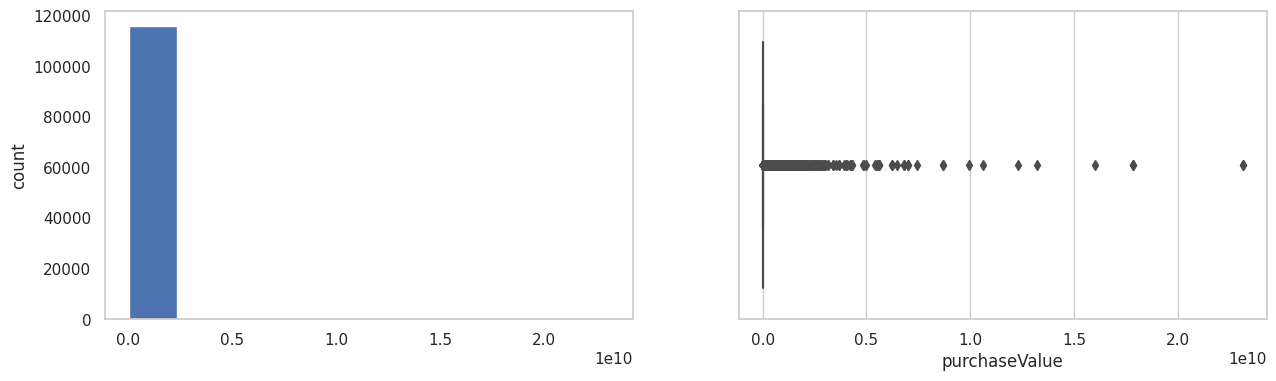

Col:userId	 Skew :0.0


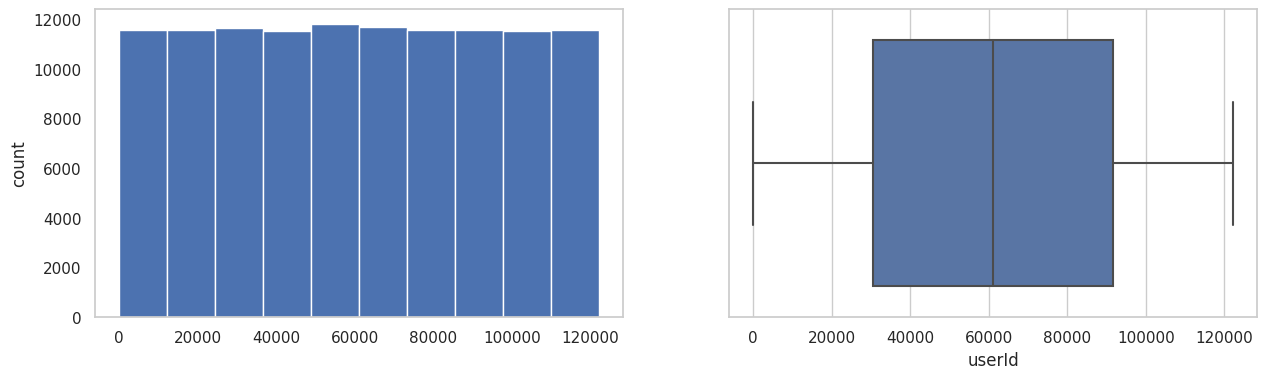

Col:gclIdPresent	 Skew :4.9


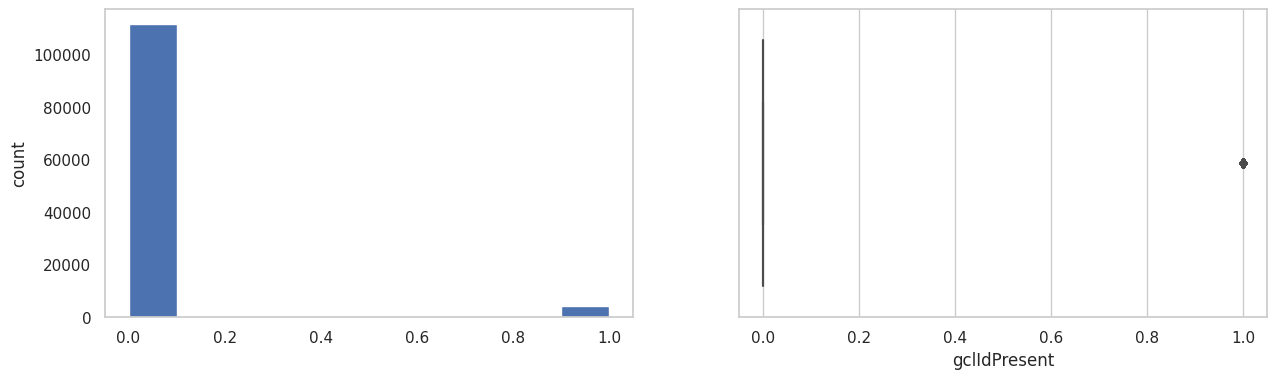

Col:sessionNumber	 Skew :20.4


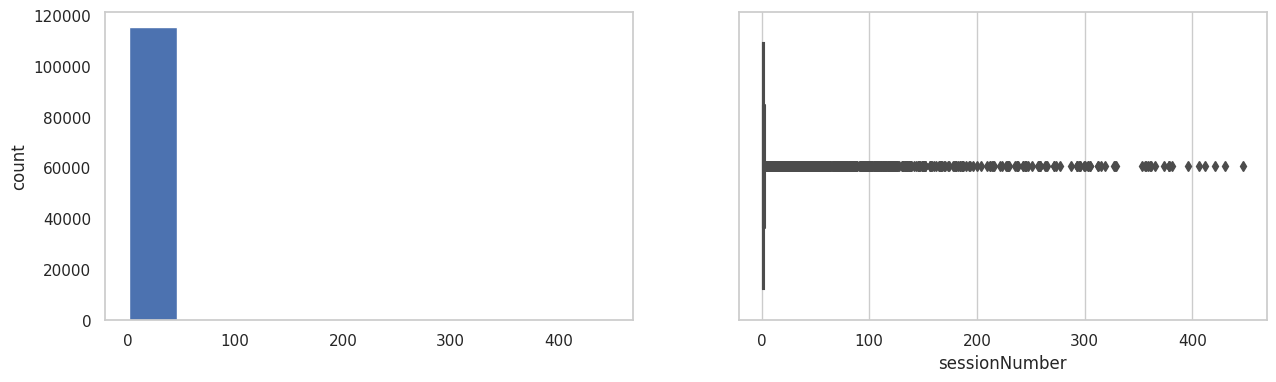

Col:sessionId	 Skew :0.4


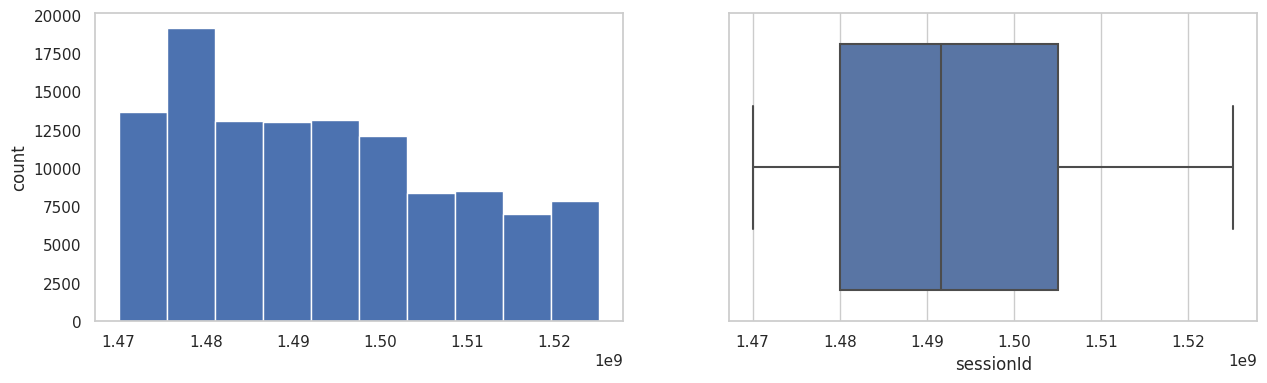

Col:trafficSource.adwordsClickInfo.page	 Skew :11.3


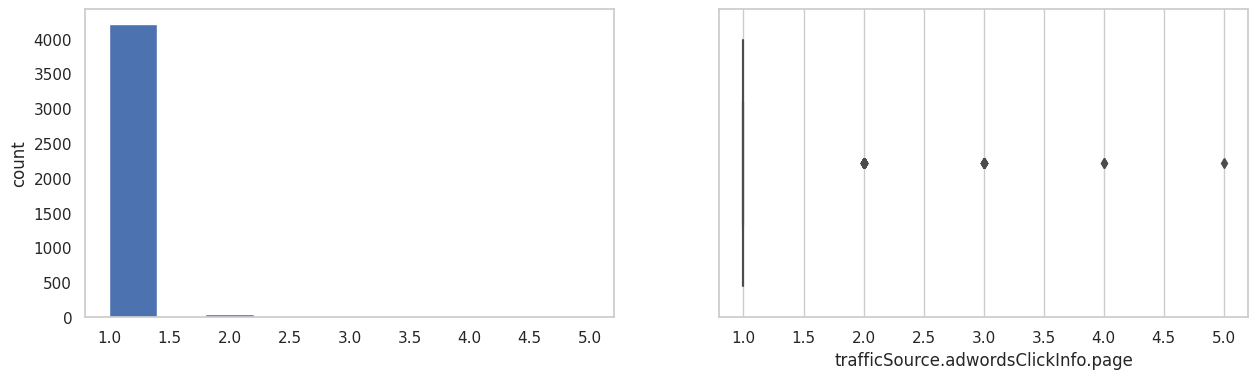

Col:pageViews	 Skew :5.8


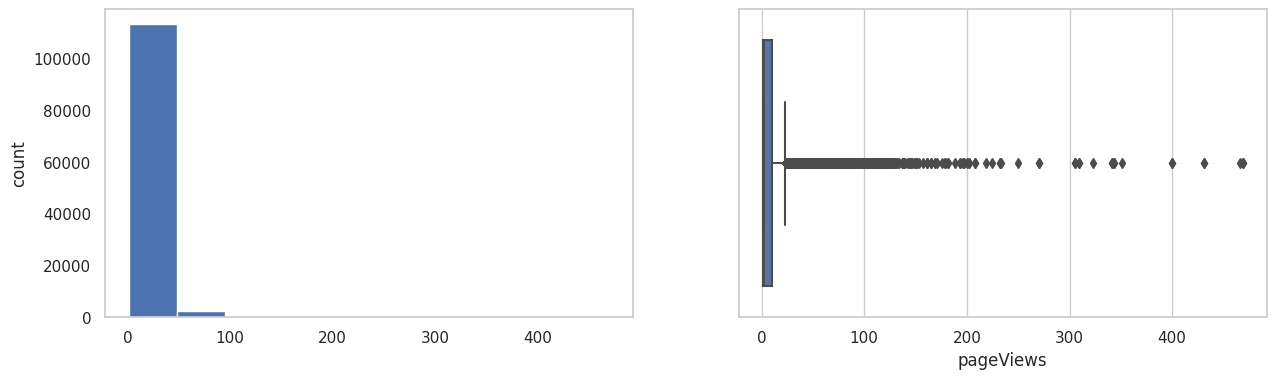

Col:date	 Skew :0.2


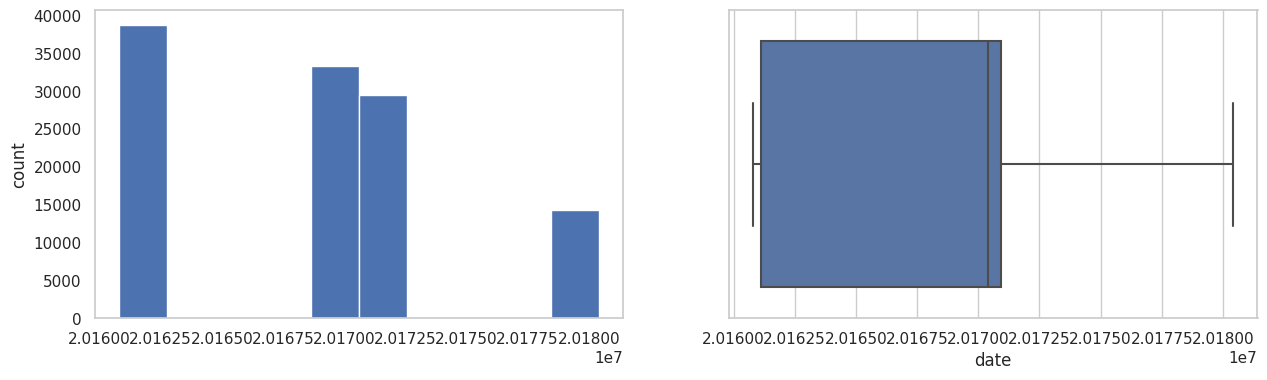

Col:totalHits	 Skew :5.6


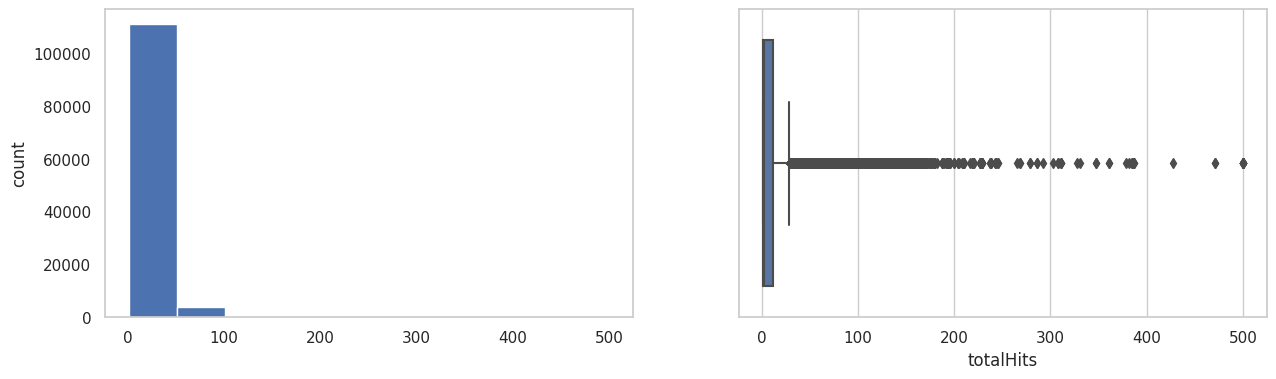

Col:sessionStart	 Skew :0.4


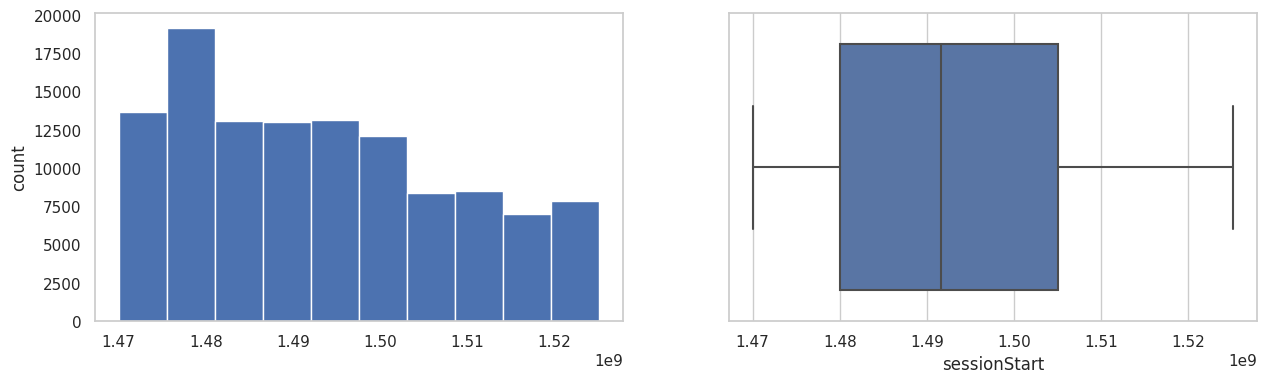

Col:device.isMobile	 Skew :1.1


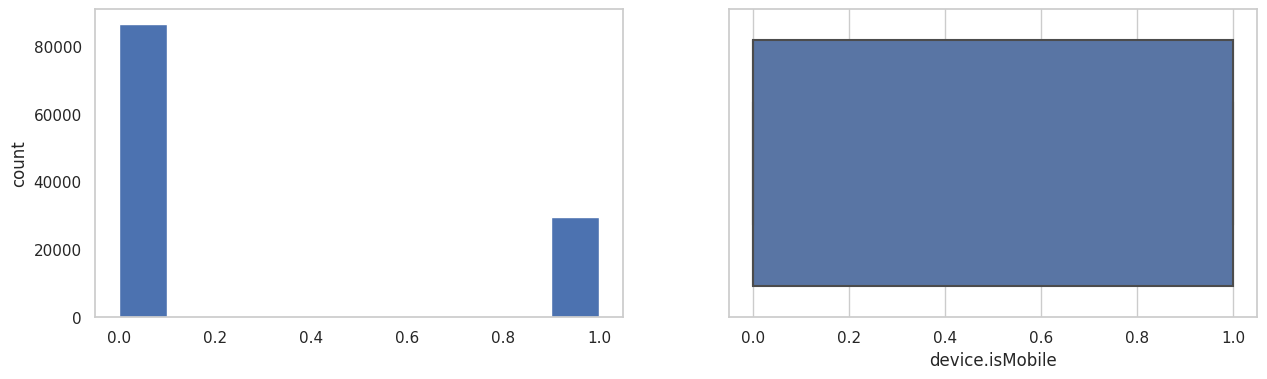

In [8]:
##--------- Plot histogram and boxplot to visualize distribution and detect outliers  ---------##
for col in list(train_dataset.select_dtypes(include=['float64','int64']).columns):
    # Columns Skewness Value
    print(f'Col:{col}\t Skew :{round(train_dataset[col].skew(), 1)}')
 
    # Plot histogram to see distribution of values
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train_dataset[col].hist(grid=False)
    plt.ylabel('count')
    
    # Plot boxplot to visualize outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_dataset[col])
    plt.show()
    
##---------  Identify the lower and upper bounds for outlier removal based on the 0.5th and 99.5th percentiles --------- ##
lower_bound = train_dataset['purchaseValue'].quantile(0.005)
upper_bound = train_dataset['purchaseValue'].quantile(0.995)

##---------  Create a boolean mask to filter out the extreme outliers --------- ##
mask = (train_dataset['purchaseValue'] >= lower_bound) & (train_dataset['purchaseValue'] <= upper_bound)
train_dataset_filtered = train_dataset[mask].reset_index(drop=True)
    

## **1.6 Univariate Analysis for categorical data**   ##


(116023, 29)

---------Analysis for browser---------
browser
Chrome                                                  84508
Safari                                                  19184
Firefox                                                  4031
Internet Explorer                                        2155
Android Webview                                          1472
Edge                                                     1216
Safari (in-app)                                           793
Opera Mini                                                733
Samsung Internet                                          563
Opera                                                     548
UC Browser                                                296
YaBrowser                                                 187
Amazon Silk                                                73
Coc Coc                                                    61
Android Browser                                            59
Mozilla C

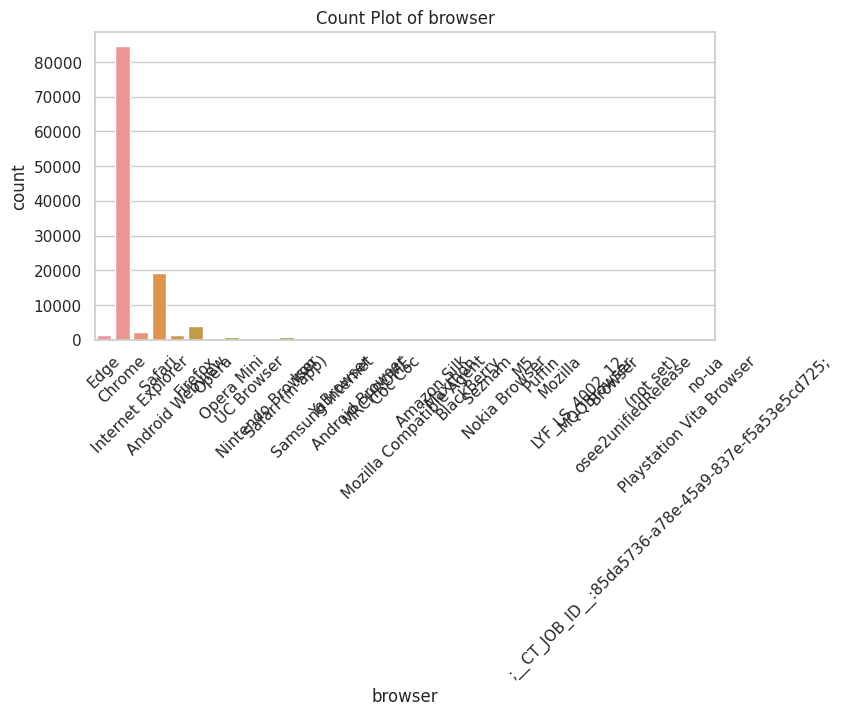


---------Analysis for trafficSource.keyword---------
trafficSource.keyword
(not provided)                     39066
6qEhsCssdK0z36ri                    1155
(User vertical targeting)            924
(automatic matching)                 670
(Remarketing/Content targeting)      316
                                   ...  
youyu                                  1
google merchasdise store               1
google + online                        1
GOOGLE MERCH STORE                     1
google youtue                          1
Name: count, Length: 566, dtype: int64

---------Percentage Distribution---------
trafficSource.keyword
(not provided)                     88.460668
6qEhsCssdK0z36ri                    2.615371
(User vertical targeting)           2.092297
(automatic matching)                1.517141
(Remarketing/Content targeting)     0.715547
                                     ...    
youyu                               0.002264
google merchasdise store            0.002264
google + 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IP

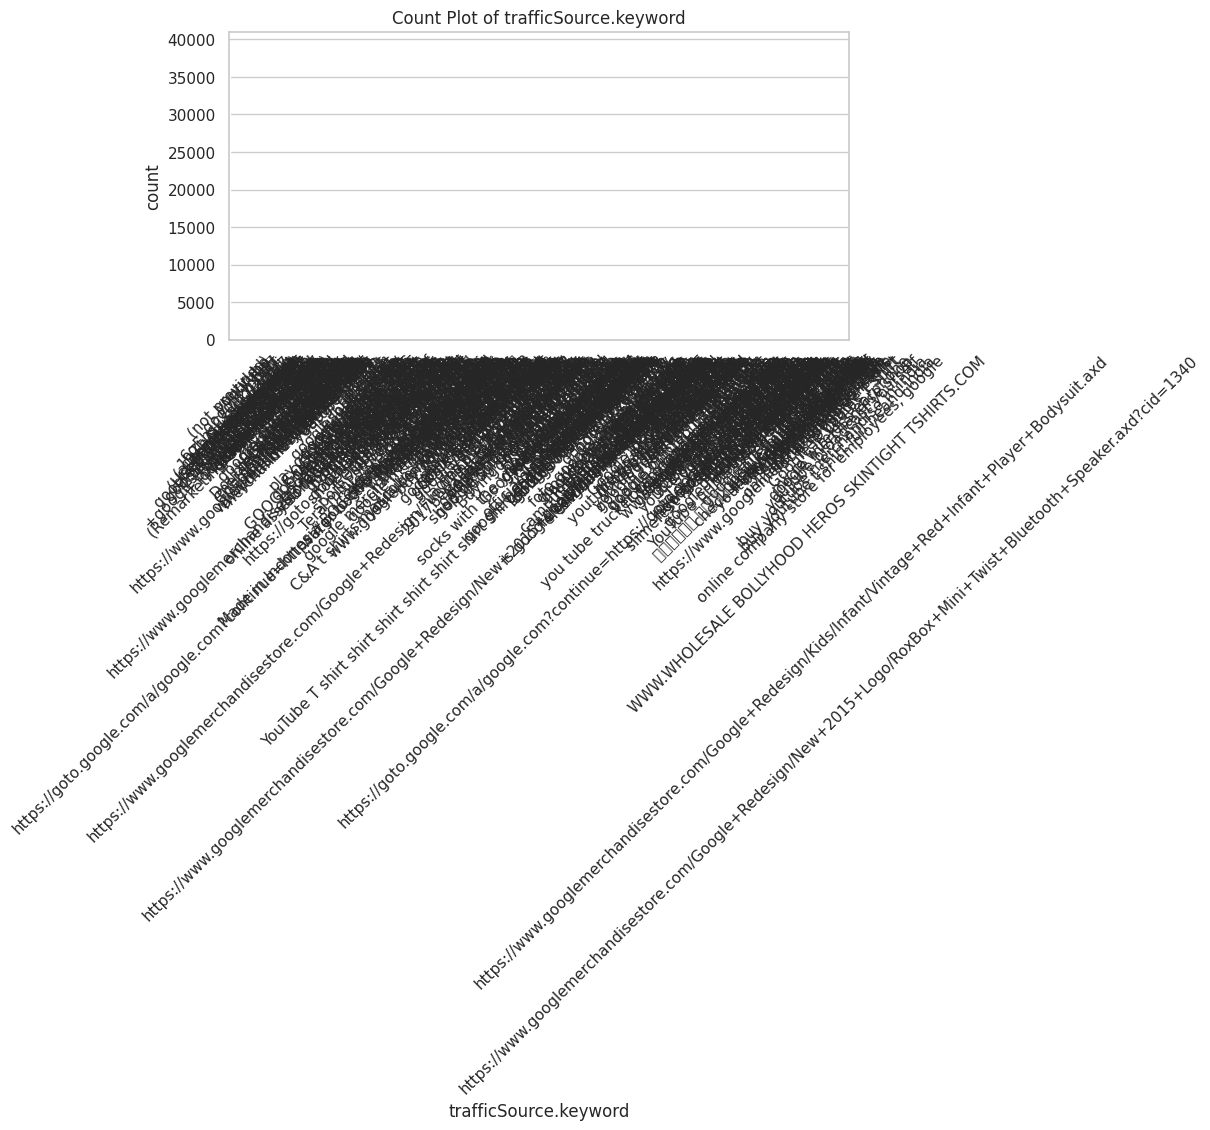


---------Analysis for geoCluster---------
geoCluster
Region_2    23294
Region_4    23278
Region_3    23221
Region_5    23211
Region_1    23019
Name: count, dtype: int64

---------Percentage Distribution---------
geoCluster
Region_2    20.077054
Region_4    20.063263
Region_3    20.014135
Region_5    20.005516
Region_1    19.840032
Name: proportion, dtype: float64


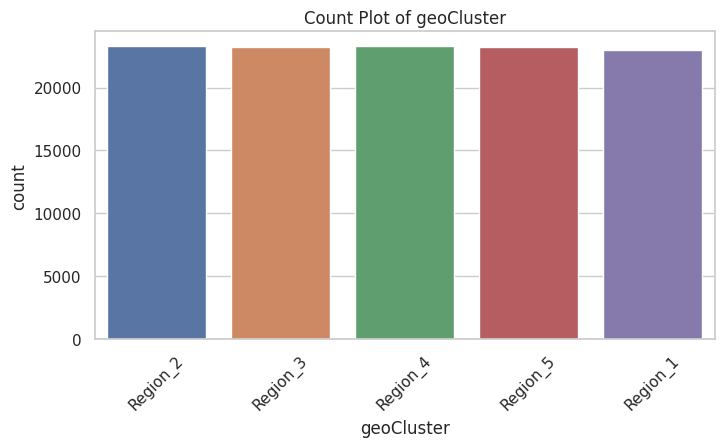


---------Analysis for trafficSource.campaign---------
trafficSource.campaign
(not set)                                                               110280
Data Share Promo                                                          1777
AW - Dynamic Search Ads Whole Site                                        1497
1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS                     855
AW - Accessories                                                           763
1000557 | GA | US | en | Hybrid | GDN Remarketing                          555
Smart Display Campaign                                                      87
"google + redesign/Accessories March 17" All Users Similar Audiences        44
"google + redesign/Accessories March 17" All Users                          27
Media & Entertainment/Movie Lovers                                          18
Sports & Fitness/Health & Fitness Buffs                                     18
Value Shoppers Affinity                              

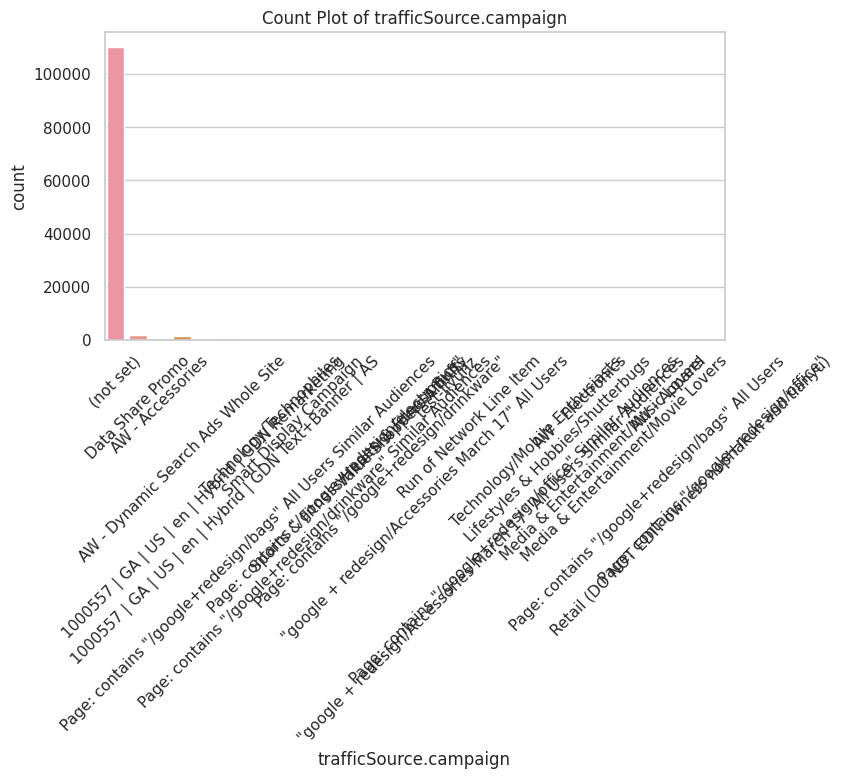


---------Analysis for geoNetwork.networkDomain---------
geoNetwork.networkDomain
domain1    38795
domain2    38619
domain3    38609
Name: count, dtype: int64

---------Percentage Distribution---------
geoNetwork.networkDomain
domain1    33.437336
domain2    33.285642
domain3    33.277023
Name: proportion, dtype: float64


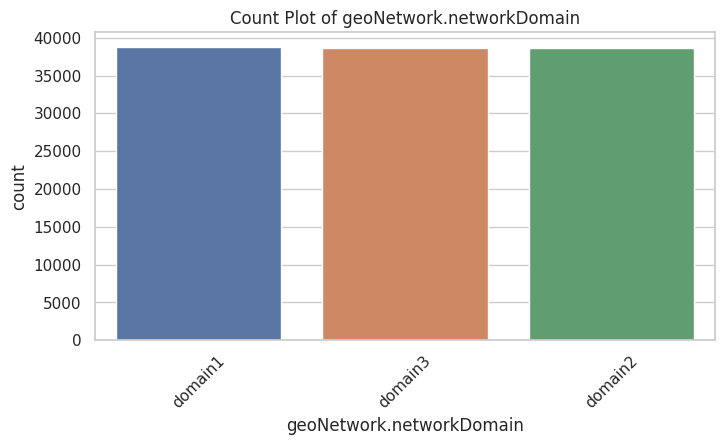


---------Analysis for geoNetwork.region---------
geoNetwork.region
not available in demo dataset    60138
California                       18122
New York                          5634
(not set)                         2806
Illinois                          1625
                                 ...  
Gangwon-do                           1
Cundinamarca                         1
Primorsky Krai                       1
County Carlow                        1
Saxony                               1
Name: count, Length: 388, dtype: int64

---------Percentage Distribution---------
geoNetwork.region
not available in demo dataset    51.832826
California                       15.619317
New York                          4.855934
(not set)                         2.418486
Illinois                          1.400584
                                   ...    
Gangwon-do                        0.000862
Cundinamarca                      0.000862
Primorsky Krai                    0.000862
County Carlow   

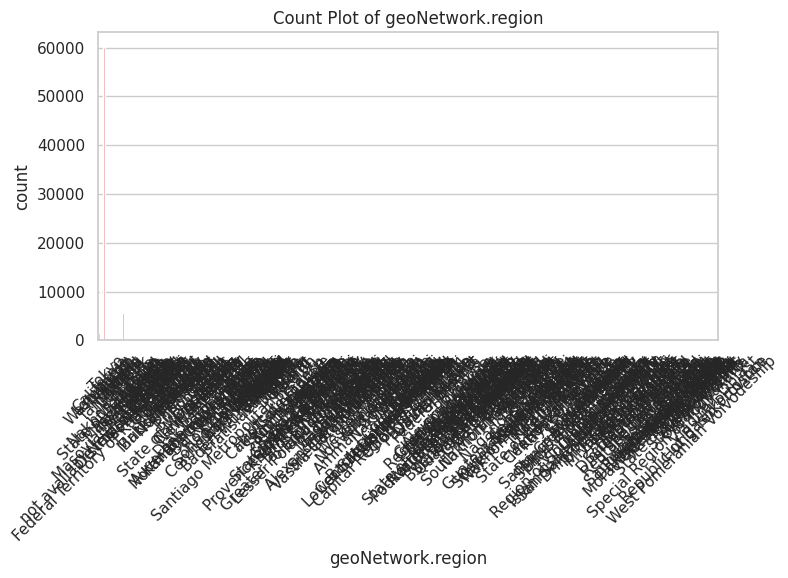


---------Analysis for trafficSource---------
trafficSource
google                     44332
(direct)                   36837
youtube.com                19211
mall.googleplex.com         6388
analytics.google.com        1826
                           ...  
google.co.za                   1
google.cl                      1
inbox.google.com               1
ca.search.yahoo.com            1
course.fso.fullsail.edu        1
Name: count, Length: 161, dtype: int64

---------Percentage Distribution---------
trafficSource
google                     38.209665
(direct)                   31.749739
youtube.com                16.557924
mall.googleplex.com         5.505805
analytics.google.com        1.573826
                             ...    
google.co.za                0.000862
google.cl                   0.000862
inbox.google.com            0.000862
ca.search.yahoo.com         0.000862
course.fso.fullsail.edu     0.000862
Name: proportion, Length: 161, dtype: float64


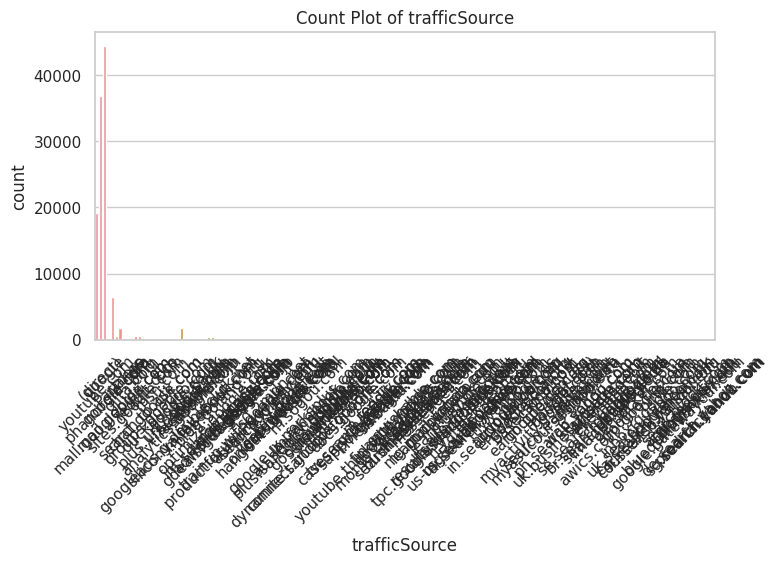


---------Analysis for os---------
os
Windows             39135
Macintosh           37659
Android             15866
iOS                 12762
Linux                5075
Chrome OS            4743
(not set)             565
Windows Phone          95
Samsung                46
Tizen                  22
BlackBerry             18
Nintendo Wii           14
Xbox                    9
Nintendo WiiU           6
OS/2                    4
Playstation Vita        2
Firefox OS              1
FreeBSD                 1
Name: count, dtype: int64

---------Percentage Distribution---------
os
Windows             33.730381
Macintosh           32.458219
Android             13.674875
iOS                 10.999543
Linux                4.374133
Chrome OS            4.087983
(not set)            0.486972
Windows Phone        0.081880
Samsung              0.039647
Tizen                0.018962
BlackBerry           0.015514
Nintendo Wii         0.012067
Xbox                 0.007757
Nintendo WiiU        0.005171
OS

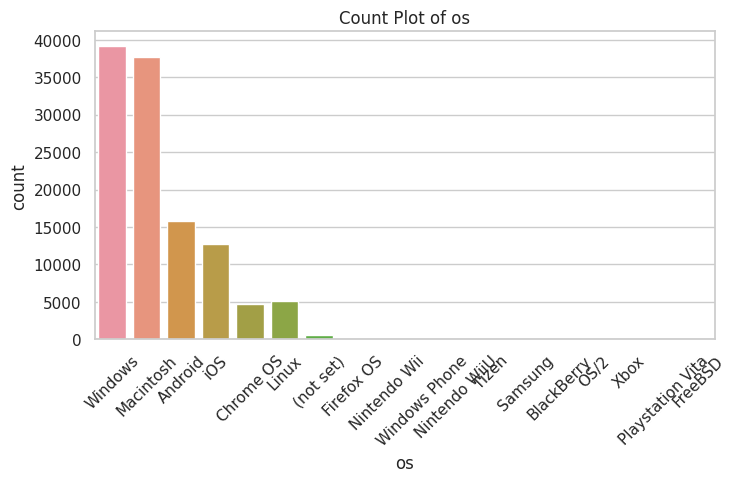


---------Analysis for geoNetwork.subContinent---------
geoNetwork.subContinent
Northern America      63596
Southeast Asia         7151
Southern Asia          6484
Western Europe         6264
Northern Europe        5998
Eastern Asia           5036
South America          4336
Eastern Europe         4277
Southern Europe        3755
Western Asia           3581
Central America        1675
Australasia            1588
Northern Africa         929
Western Africa          315
Southern Africa         264
Caribbean               249
Eastern Africa          193
(not set)               136
Central Asia            132
Middle Africa            46
Micronesian Region       11
Melanesia                 5
Polynesia                 2
Name: count, dtype: int64

---------Percentage Distribution---------
geoNetwork.subContinent
Northern America      54.813270
Southeast Asia         6.163433
Southern Asia          5.588547
Western Europe         5.398930
Northern Europe        5.169665
Eastern Asia           

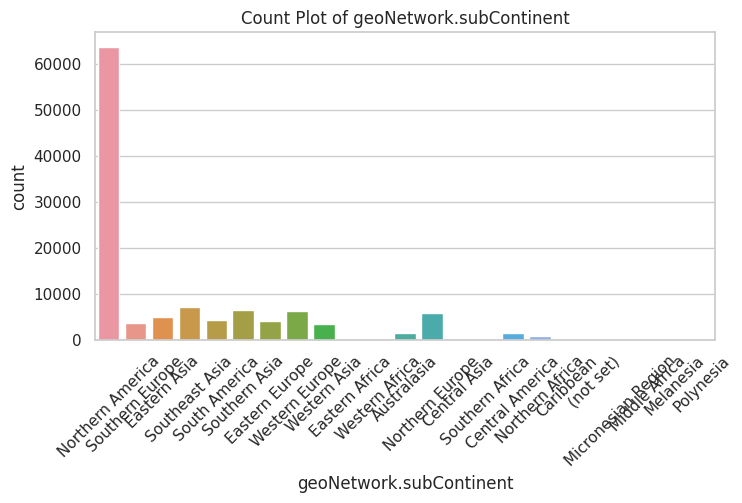


---------Analysis for trafficSource.medium---------
trafficSource.medium
organic      40654
(none)       36837
referral     31657
cpc           4286
affiliate     1777
cpm            802
(not set)       10
Name: count, dtype: int64

---------Percentage Distribution---------
trafficSource.medium
organic      35.039604
(none)       31.749739
referral     27.285107
cpc           3.694095
affiliate     1.531593
cpm           0.691242
(not set)     0.008619
Name: proportion, dtype: float64


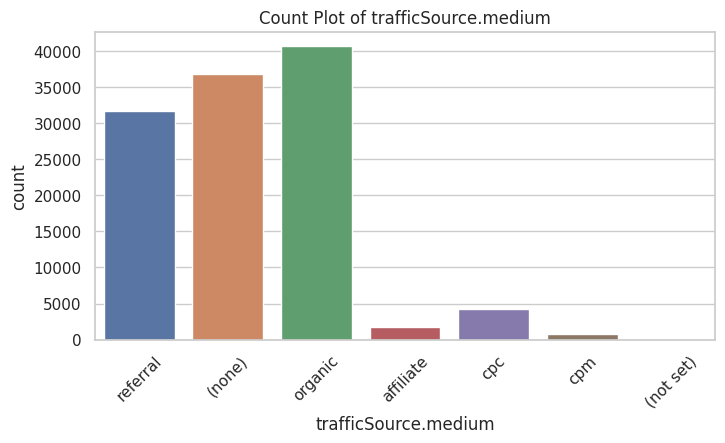


---------Analysis for locationCountry---------
locationCountry
United States               60369
India                        5596
United Kingdom               3902
Canada                       3226
Vietnam                      2119
                            ...  
St. Vincent & Grenadines        1
São Tomé & Príncipe             1
Bermuda                         1
Gibraltar                       1
U.S. Virgin Islands             1
Name: count, Length: 193, dtype: int64

---------Percentage Distribution---------
locationCountry
United States               52.031925
India                        4.823182
United Kingdom               3.363126
Canada                       2.780483
Vietnam                      1.826362
                              ...    
St. Vincent & Grenadines     0.000862
São Tomé & Príncipe          0.000862
Bermuda                      0.000862
Gibraltar                    0.000862
U.S. Virgin Islands          0.000862
Name: proportion, Length: 193, dtype: float64


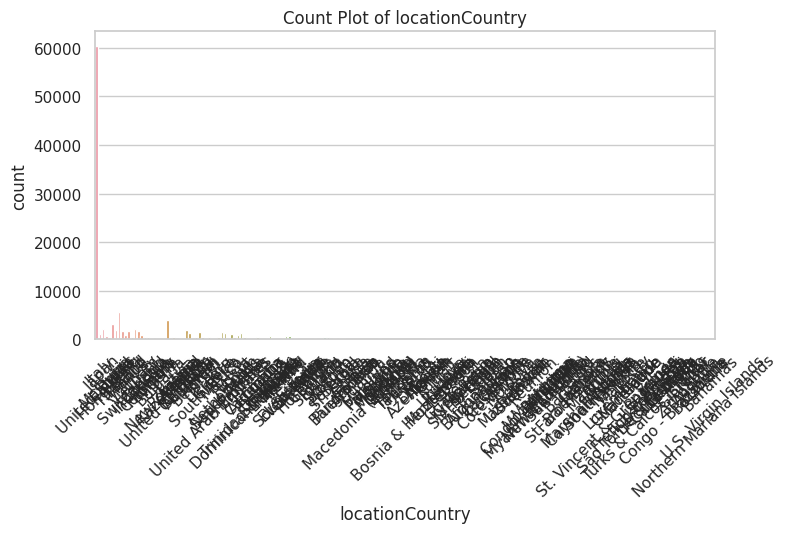


---------Analysis for trafficSource.adwordsClickInfo.adNetworkType---------
trafficSource.adwordsClickInfo.adNetworkType
Google Search    2784
Content          1497
Name: count, dtype: int64

---------Percentage Distribution---------
trafficSource.adwordsClickInfo.adNetworkType
Google Search    65.031535
Content          34.968465
Name: proportion, dtype: float64


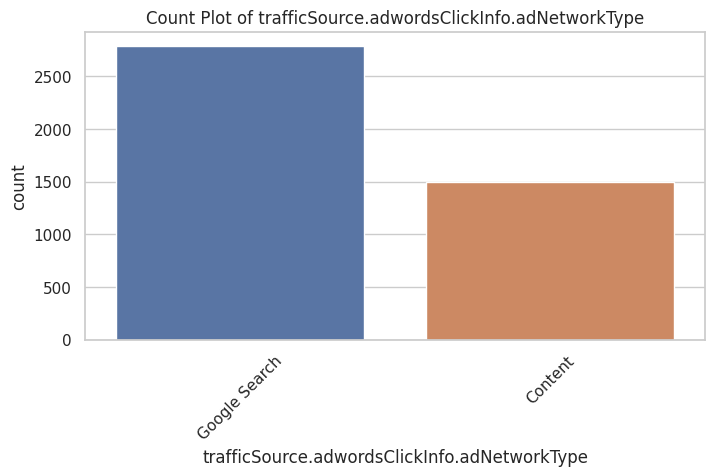


---------Analysis for geoNetwork.city---------
geoNetwork.city
not available in demo dataset    60138
Mountain View                     6672
New York                          5622
(not set)                         3603
San Francisco                     3479
                                 ...  
Kosice                               1
Telford                              1
Nuremberg                            1
Sao Goncalo                          1
Foster City                          1
Name: count, Length: 695, dtype: int64

---------Percentage Distribution---------
geoNetwork.city
not available in demo dataset    51.832826
Mountain View                     5.750584
New York                          4.845591
(not set)                         3.105419
San Francisco                     2.998543
                                   ...    
Kosice                            0.000862
Telford                           0.000862
Nuremberg                         0.000862
Sao Goncalo           

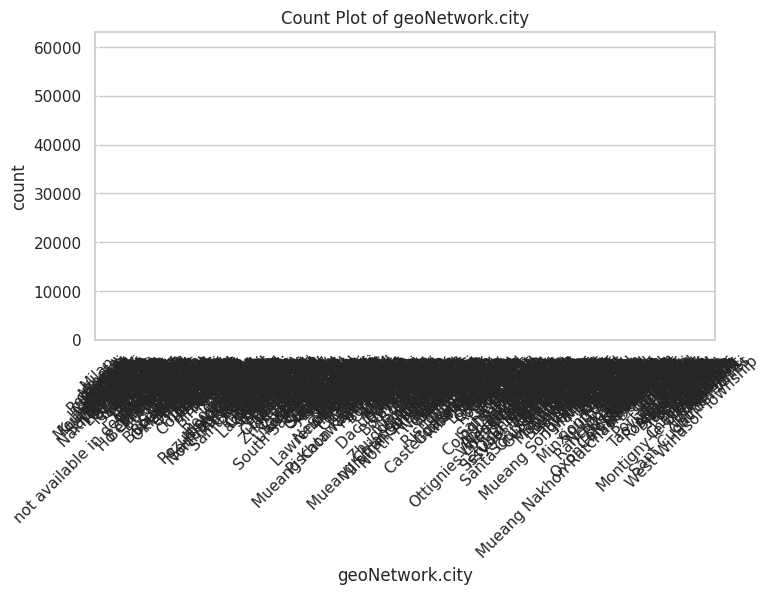


---------Analysis for geoNetwork.metro---------
geoNetwork.metro
not available in demo dataset                60138
(not set)                                    21641
San Francisco-Oakland-San Jose CA            16075
New York NY                                   5702
Los Angeles CA                                1747
                                             ...  
Greenville-Spartanburg-Asheville-Anderson        1
Columbus GA                                      1
Flint-Saginaw-Bay City MI                        1
Toledo OH                                        1
Lincoln & Hastings-Kearney NE                    1
Name: count, Length: 104, dtype: int64

---------Percentage Distribution---------
geoNetwork.metro
not available in demo dataset                51.832826
(not set)                                    18.652336
San Francisco-Oakland-San Jose CA            13.855012
New York NY                                   4.914543
Los Angeles CA                                1.505736

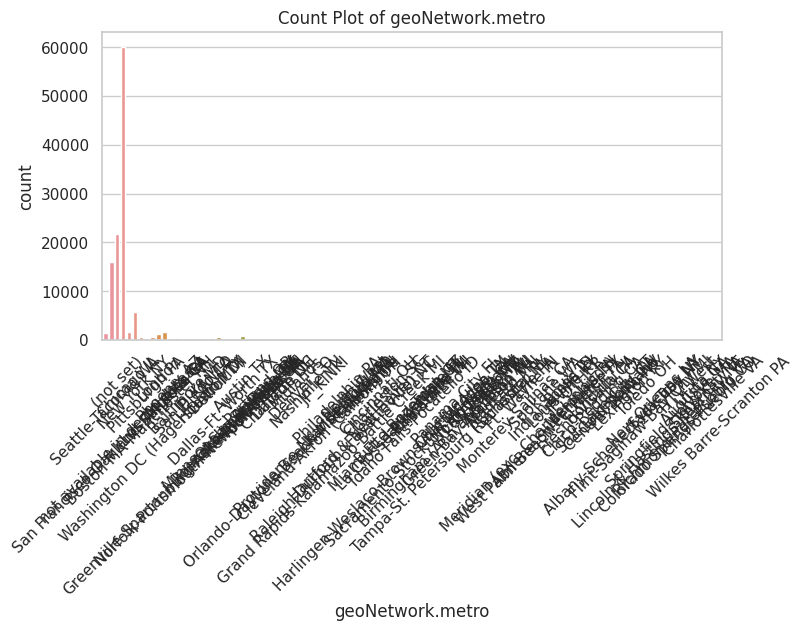


---------Analysis for trafficSource.referralPath---------
trafficSource.referralPath
/                                                                                                                                                                                                         17970
/yt/about/                                                                                                                                                                                                 5212
/analytics/web/                                                                                                                                                                                            1633
/yt/about/tr/                                                                                                                                                                                              1054
/yt/about/vi/                                                                     

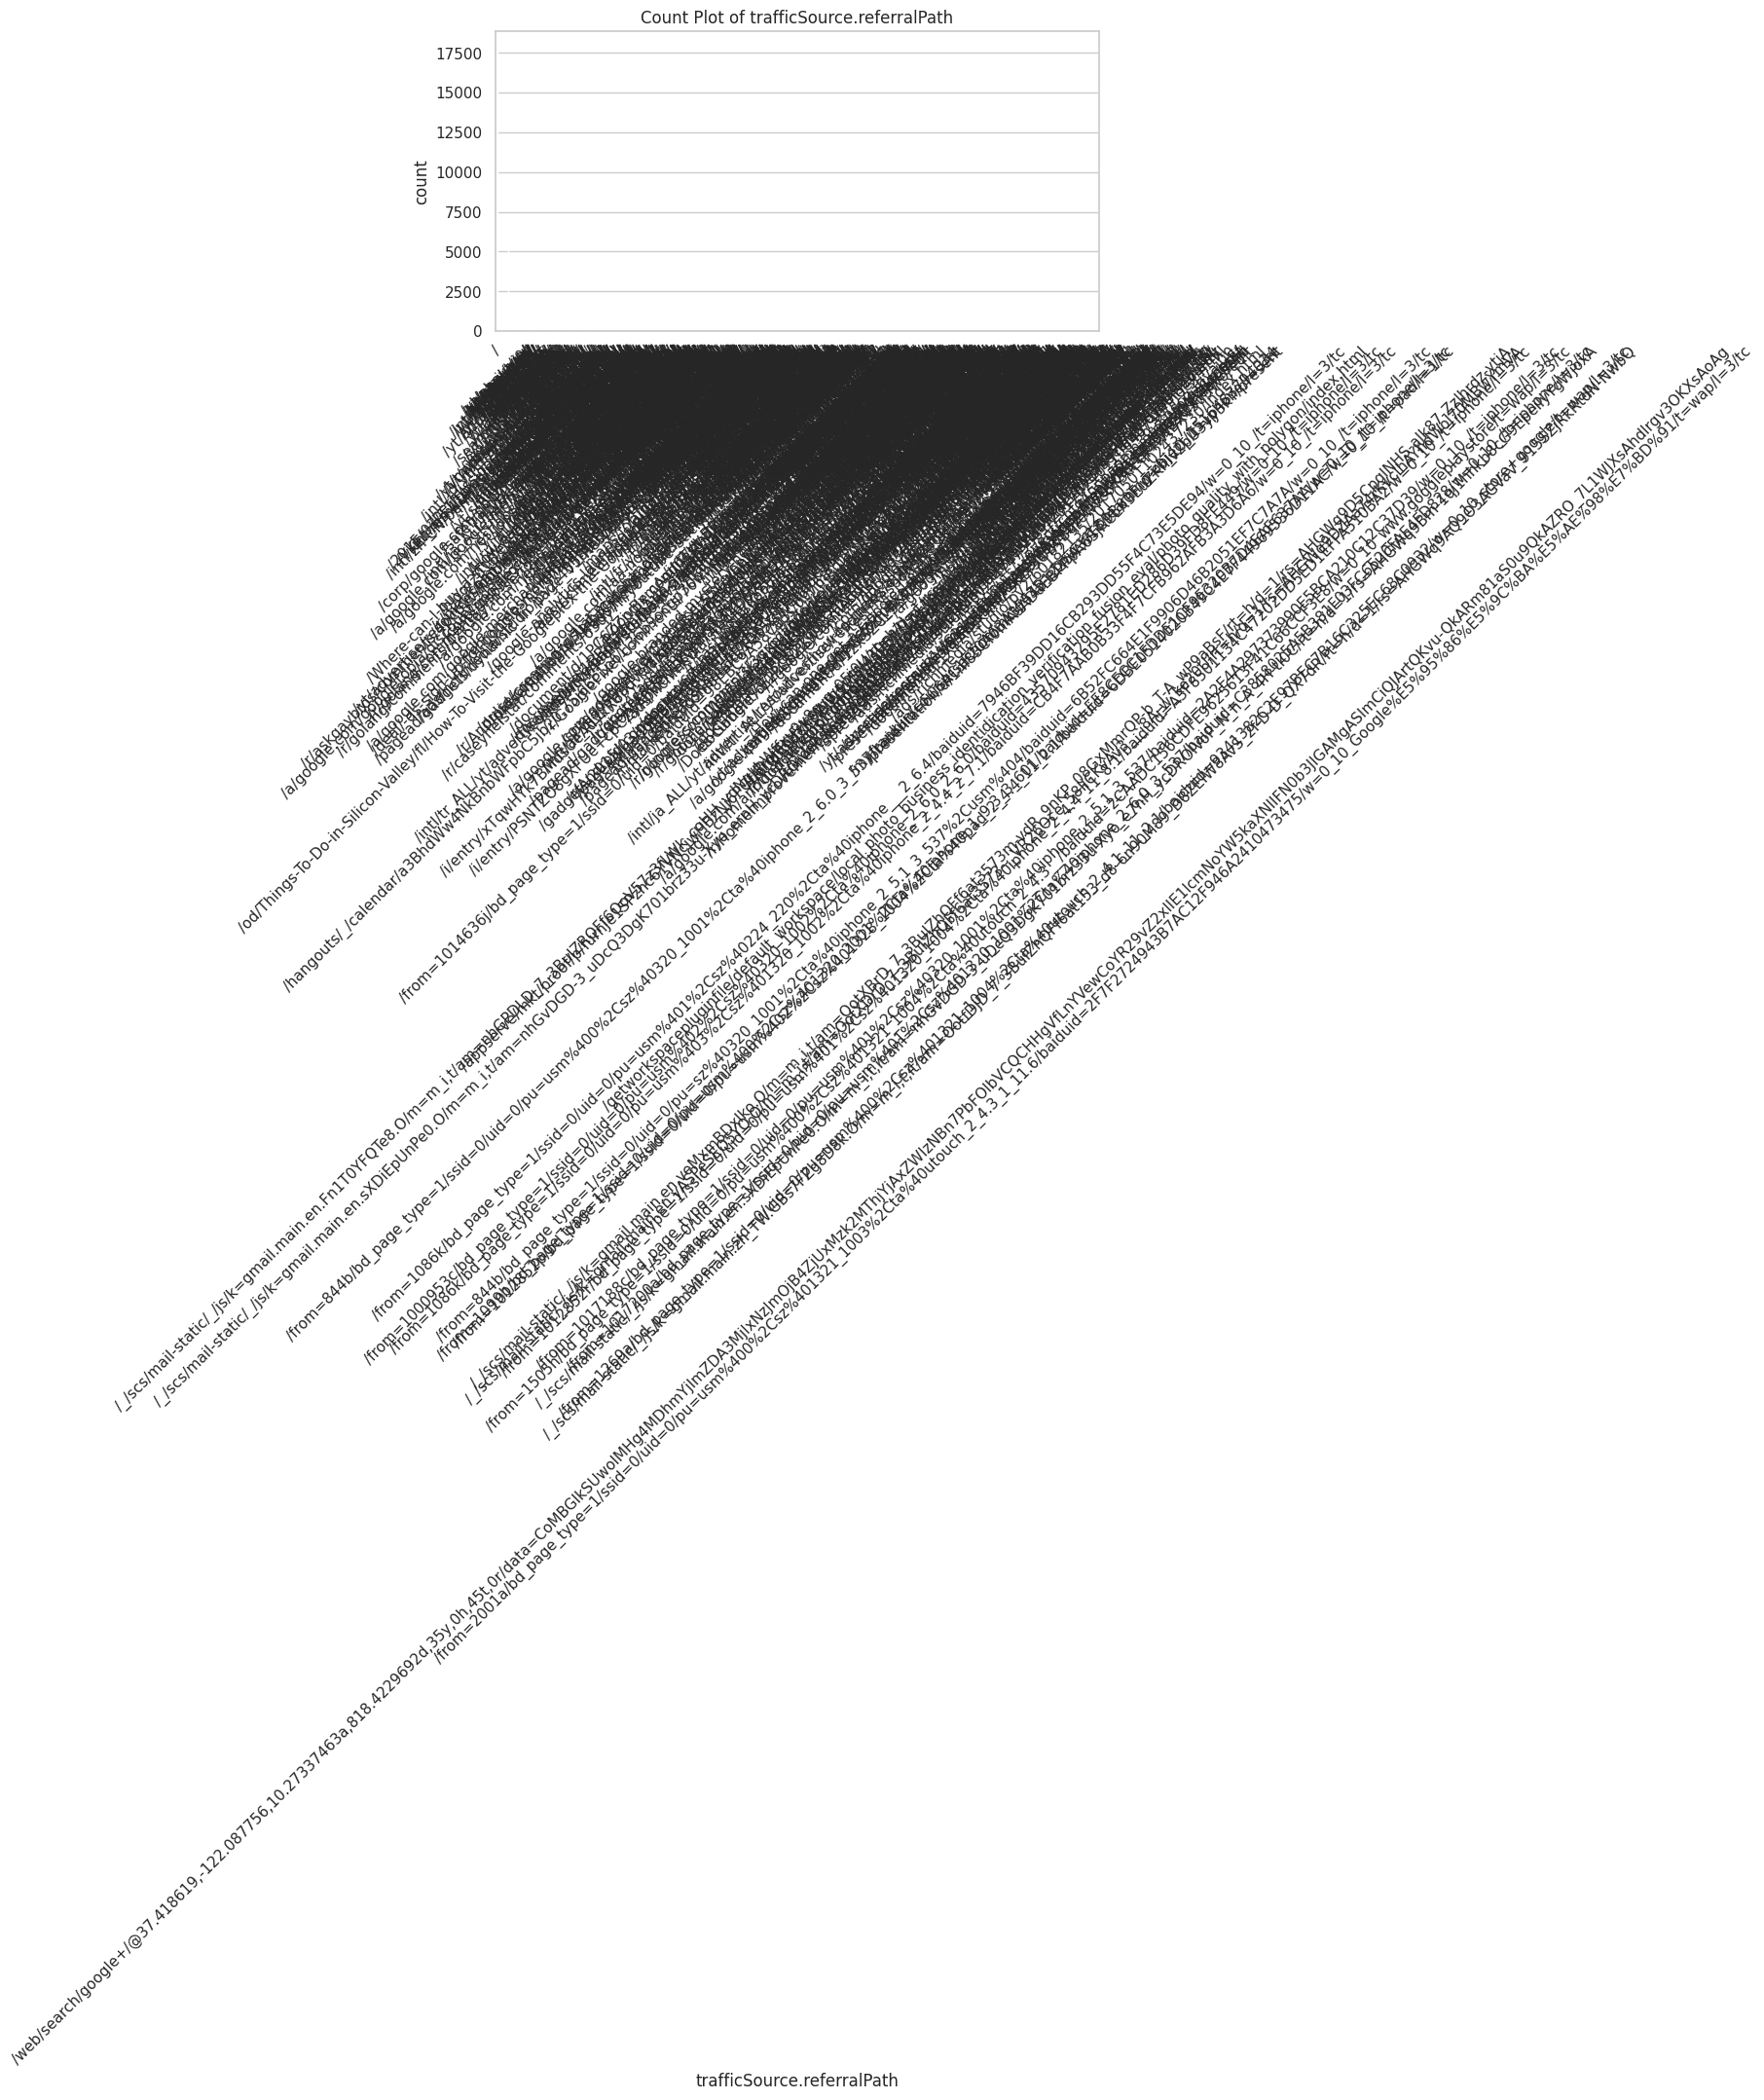


---------Analysis for deviceType---------
deviceType
desktop    86480
mobile     25850
tablet      3693
Name: count, dtype: int64

---------Percentage Distribution---------
deviceType
desktop    74.536945
mobile     22.280065
tablet      3.182990
Name: proportion, dtype: float64


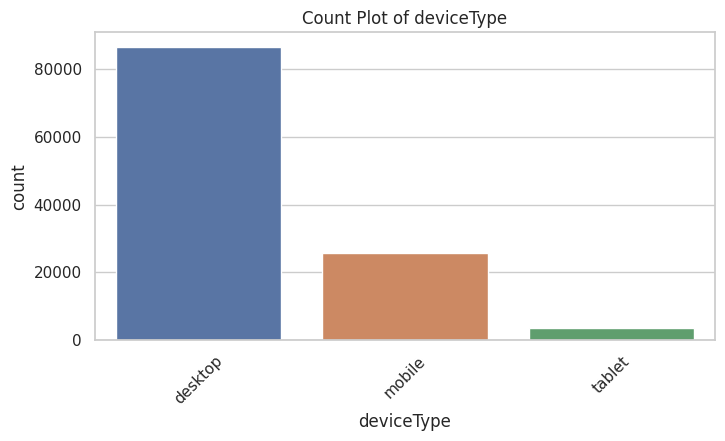


---------Analysis for userChannel---------
userChannel
Organic Search    46925
Referral          21932
Social            20786
Direct            18886
Paid Search        3406
Display            2301
Affiliates         1777
(Other)              10
Name: count, dtype: int64

---------Percentage Distribution---------
userChannel
Organic Search    40.444567
Referral          18.903149
Social            17.915413
Direct            16.277807
Paid Search        2.935625
Display            1.983227
Affiliates         1.531593
(Other)            0.008619
Name: proportion, dtype: float64


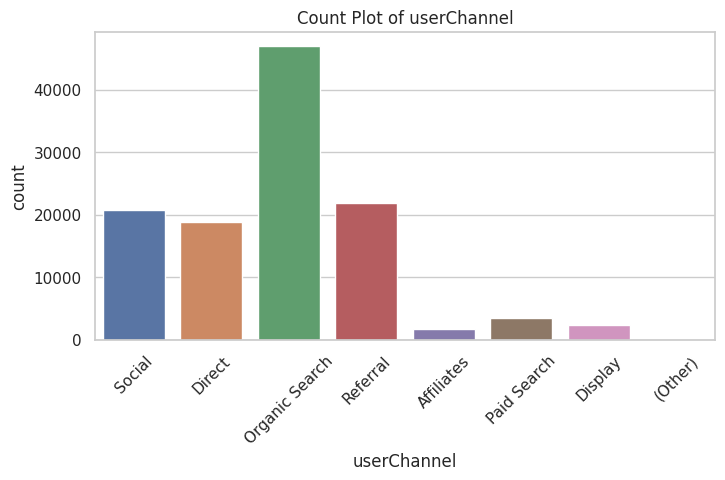


---------Analysis for geoNetwork.continent---------
geoNetwork.continent
Americas     69856
Asia         22384
Europe       20294
Africa        1747
Oceania       1606
(not set)      136
Name: count, dtype: int64

---------Percentage Distribution---------
geoNetwork.continent
Americas     60.208752
Asia         19.292726
Europe       17.491359
Africa        1.505736
Oceania       1.384208
(not set)     0.117218
Name: proportion, dtype: float64


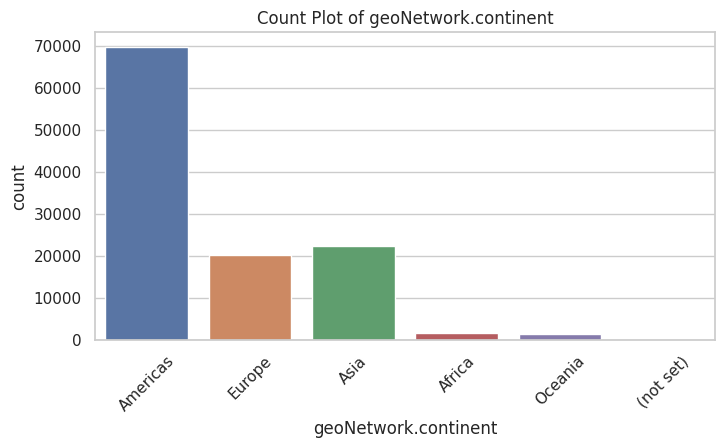

In [9]:
##--------- Univariate Analysis for categorical data ---------##
print(train_dataset.shape)
for col in list(train_dataset.select_dtypes(include=['object','bool']).columns):
    print(f"\n---------Analysis for {col}---------")
    
    # Frequency Table
    print(train_dataset[col].value_counts())
    
    # Percentage Distribution
    print("\n---------Percentage Distribution---------")
    print(train_dataset[col].value_counts(normalize=True) * 100)
    
    # Visualization (Bar Plot)
    plt.figure(figsize=(8, 4))
    sns.countplot(x=train_dataset[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
##---------  Dropping Categorical Columns ---------## 
train_dataset_final_col_drop=train_dataset.drop(columns=['trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.page'])
test_dataset_final_col_drop=test_dataset.drop(columns=['trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.page'])

##--------- Dimension and Final Columns Checking ---------##
print("Train Dataset Shape after removing few more categorical columns:\t",train_dataset_final_col_drop.shape)
print("Test Dataset Shape after removing few more categorical columns:\t",test_dataset_final_col_drop.shape)
print("Common Columns:\t",set(train_dataset_final_col_drop.columns)&set(test_dataset_final_col_drop.columns))
print("Extra Columns (Train): ",set(train_dataset_final_col_drop.columns)-set(test_dataset_final_col_drop.columns))
print("Extra Columns (Test):",set(test_dataset_final_col_drop.columns)-set(train_dataset_final_col_drop.columns))


Train Dataset Shape after removing few more categorical columns:	 (116023, 27)
Test Dataset Shape after removing few more categorical columns:	 (29006, 26)
Common Columns:	 {'geoNetwork.subContinent', 'geoNetwork.metro', 'trafficSource.referralPath', 'geoNetwork.continent', 'geoCluster', 'sessionNumber', 'browser', 'locationCountry', 'deviceType', 'os', 'trafficSource.medium', 'sessionStart', 'geoNetwork.city', 'pageViews', 'date', 'trafficSource.campaign', 'geoNetwork.region', 'gclIdPresent', 'userChannel', 'device.isMobile', 'geoNetwork.networkDomain', 'trafficSource.keyword', 'trafficSource', 'userId', 'totalHits', 'sessionId'}
Extra Columns (Train):  {'purchaseValue'}
Extra Columns (Test): set()


## **1.7 Correlation Matrix** ##

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


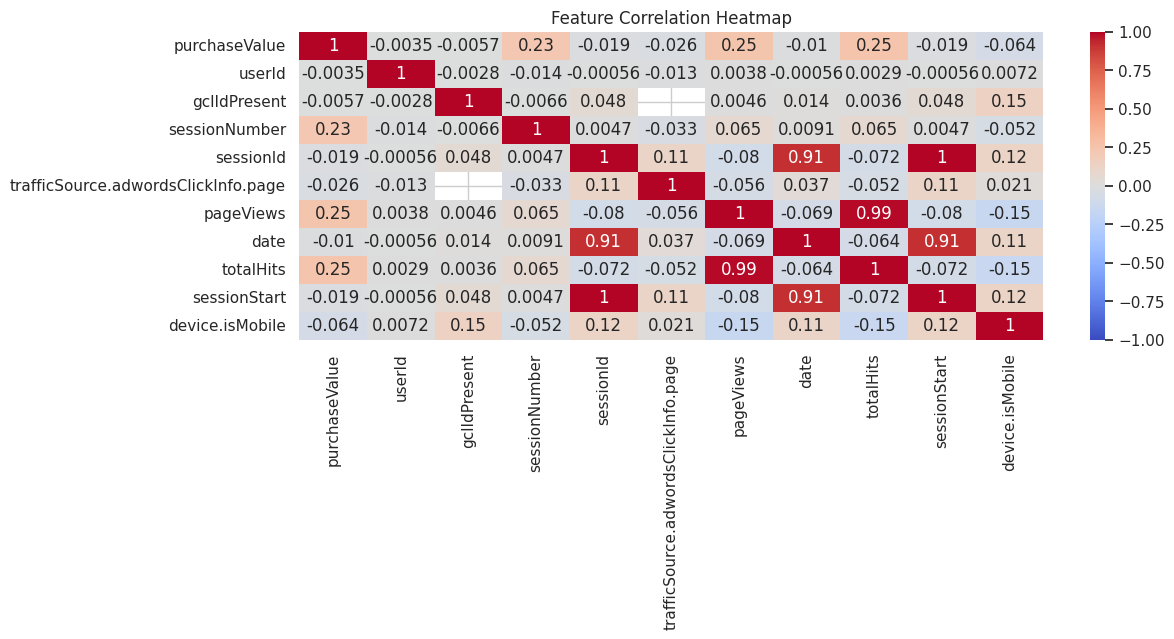

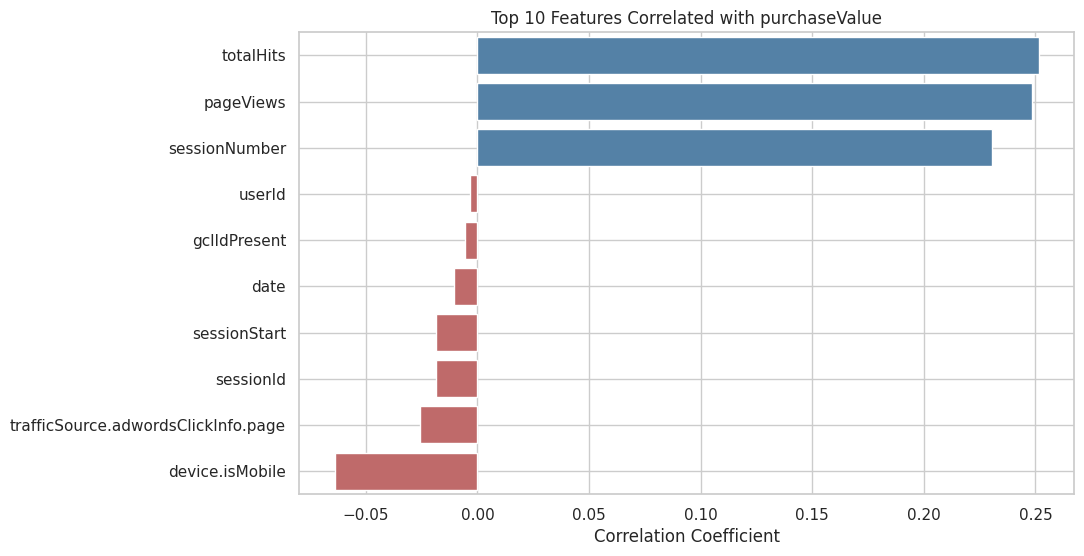

In [11]:
##--------- Correlation Heat Map ---------##

# Plotting a heatmap to visualize correlation between all numerical features
# Helps identify multicollinearity and relationships between features
plt.figure(figsize=(12, 4))
sns.heatmap(train_dataset.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


##--------- Correlation Heatmap (Top 10 Correlated with Target) ---------##

# Useful for feature selection and understanding influential predictors
if 'purchaseValue' in train_dataset.columns:
    
    # Compute correlation matrix for numerical features
    corr_matrix = train_dataset.corr(numeric_only=True)
    
    # Select top 10 features most correlated with 'purchaseValue' (excluding itself)
    top_corr = corr_matrix['purchaseValue'].drop('purchaseValue').sort_values(ascending=False).head(10)
    
    # Plot a horizontal bar chart to visualize these correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_corr.values, y=top_corr.index,palette=['steelblue' if x > 0 else 'indianred' for x in top_corr.values])
    plt.title('Top 10 Features Correlated with purchaseValue')
    plt.xlabel('Correlation Coefficient')
    plt.grid(True)
    plt.show()



## **1.7.1 Insights** ##
-----
**Top Positively Correlated Features:**
- **`totalHits`** (`r ≈ 0.25`)  
- Strongest correlation; more user interactions generally result in more purchases.
- **`pageViews`** (`r ≈ 0.25`)  
- Users who view more pages are more likely to convert.
- **`sessionNumber`** (`r ≈ 0.23`)  
- Repeat sessions positively influence purchase behavior.

**Weak or Negligible Correlation**
- **`userId`, `gclIdPresent`, `date`, `sessionStart`, `sessionId`**  
- Minimal direct influence on purchase value.

**Negatively Correlated Features:**
- **`device.isMobile`:** (`r ≈ -0.06`)  
- Mobile users are slightly less likely to make high-value purchases.
- **`trafficSource.adwordsClickInfo.page`** (`r ≈ -0.03`)  
- Weak negative signal; some ad sources may not lead to purchases.

**Multicollinearity Detected:**
- **(`pageViews`;`totalHits`), (`sessionStart`;`sessionId`)** show extremely high correlation (`r ≈ 0.99`)  
- May indicate redundancy. Consider dimensionality reduction (PCA or feature selection).


## **1.8 Pre-Processing functions (Cleaning, Normalizing, Remove Outliers, Feature Engg, etc)** ##

In [12]:
##--------- Import Necessary Libraries ---------##
from collections import Counter
from scipy.stats import median_abs_deviation
from category_encoders import CatBoostEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, FunctionTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

##--------- Function to Normalize Category Strings ---------##
def normalize_categories(df_train, df_test):
    """
    Standardizes string categories by lowercasing and stripping spaces.
    Ensures categorical values are formatted consistently.

    Parameters:
    - df_train: trained data
    - df_test: test data
    """
    categorical_cols_train = df_train.select_dtypes(include=["object", "category"]).columns
    categorical_cols_test = df_test.select_dtypes(include=["object", "category"]).columns
    categorical_cols = set(categorical_cols_train).intersection(set(categorical_cols_test))
    
    for col in categorical_cols:
        df_train[col] = df_train[col].astype(str).str.strip().str.lower()
        df_test[col] = df_test[col].astype(str).str.strip().str.lower()

    return df_train, df_test

##--------- Function to Align Categorical Values Between Train and Test Sets ---------##
def align_categorical_columns(train_df, test_df):
    """
    Ensures that both train and test sets have the same categories for object columns.
    Unmatched categories are set to NaN for consistent encoding later.

    Parameters:
    - train_df: trained data
    - test_df: test data
    """
    train_df = train_df.copy()
    test_df = test_df.copy()
    categorical_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
    
    for col in categorical_cols:
        # Normalize category values (lowercase + strip spaces)
        train_df[col] = train_df[col].astype(str).str.lower().str.strip()
        test_df[col] = test_df[col].astype(str).str.lower().str.strip()
        
        # Retain only common values in both train and test
        common_values = set(train_df[col].unique()) & set(test_df[col].unique())
        train_df[col] = train_df[col].where(train_df[col].isin(common_values), np.nan)
        test_df[col] = test_df[col].where(test_df[col].isin(common_values), np.nan)
    
    return train_df, test_df

##--------- Function to Clip Outliers ---------##
def clip_outliers(X):
    """
    Clips extreme values outside the 1st and 99th percentiles.
    Helps reduce the influence of outliers on model training.

    Parameters:
    - X: DataFrame
    """
    df = pd.DataFrame(X)
    lower = df.quantile(0.01)
    upper = df.quantile(0.99)
    return df.clip(lower=lower, upper=upper, axis=1)

##--------- Feature Engineering Function ---------##
def add_features(df):
    """
    Creates new time-based and ratio-based features from existing columns.
    Renames certain columns for semantic clarity.

    Parameters:
    - df: DataFrame
    """
    df = df.copy()

    # Parse sessionStart timestamp to datetime and extract components
    if 'sessionStart' in df.columns:
        df['sessionStart'] = pd.to_datetime(df['sessionStart'], unit='s')
        df['sessionStart_hour'] = df['sessionStart'].dt.hour
        df['sessionStart_day'] = df['sessionStart'].dt.day
        df['sessionStart_weekday'] = df['sessionStart'].dt.weekday
        df['sessionStart_month'] = df['sessionStart'].dt.month
        df['sessionStart_year'] = df['sessionStart'].dt.year

    # Log-transform session count
    if 'sessionNumber' in df.columns:
        df['log_sessionNumber'] = np.log1p(df['sessionNumber'])
        df["Avg_sessionper_user"]=df.groupby('userId')['sessionNumber'].nunique()
    # Time spent per hit
    if 'totals.timeOnSite' in df.columns and 'totals.hits' in df.columns:
        df['avg_time_per_hit'] = df['totals.timeOnSite'] / df['totals.hits'].replace(0, np.nan)

    # Bounce rate calculation
    if 'totals.bounces' in df.columns and 'totals.visits' in df.columns:
        df['bounce_rate'] = df['totals.bounces'] / (df['totals.visits'] + 1)

    # Parse date and extract components
    if 'date' in df.columns:
        date_col = 'YYMD'
        df[date_col] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')
        df['year'] = df[date_col].dt.year
        df['month_'] = df[date_col].dt.month
        df['day_'] = df[date_col].dt.day
        df['weekday_'] = df[date_col].dt.weekday
        df['is_weekend'] = df['weekday_'].isin([5, 6]).astype(int)
        df['quarter'] = df[date_col].dt.quarter

    # Rename columns for clarity (Semantic Meaning)
    df.rename(columns={
        'gclIdPresent': 'has_gclid',
        'device.isMobile': 'is_mobile_device',
        'trafficSource.adwordsClickInfo.page': 'ad_page',
        'totals.bounces': 'is_bounces'
    }, inplace=True)

    # Drop intermediate or redundant columns
    return df.drop(columns=['sessionStart', 'YYMD', 'gclIdPresent', 'device.isMobile', 'totals.bounces'], errors='ignore')

##--------- Main Preprocessing Function ---------##
def simple_preprocess(train_data, test_data):
    """
    Main preprocessing function that:
    - Aligns columns
    - Handles outliers
    - Imputes missing values
    - Encodes categorical features
    - Returns processed train/test features and target
    """
    print("Before preprocessing:")
    print("Train shape:", train_data.shape, train_data.columns)
    print("Test shape:", test_data.shape)

    if "purchaseValue" not in train_data.columns:
        raise ValueError("Target column 'purchaseValue' not found in training data")

    # Split into target and features
    target = train_data["purchaseValue"]
    features = train_data.drop(columns=["purchaseValue"])

    # Align feature columns between train and test
    shared_cols = list(set(features.columns).intersection(set(test_data.columns)))
    features = features[shared_cols].copy()
    test_data = test_data[shared_cols].copy()

    # Identify numeric and categorical columns
    numerics = features.select_dtypes(include=[np.number]).columns
    categories = features.select_dtypes(include=["object", "category"]).columns

    ##--------- Numeric Pipeline: Outlier Clipping + Imputation + Scaling ---------##
    num_pipe = Pipeline([
         ('clipper', FunctionTransformer(clip_outliers, validate=False)),
         ('imputer', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler())
    ])

    # Apply numeric pipeline to both train and test
    features[numerics] = num_pipe.fit_transform(features[numerics])
    test_data[numerics] = num_pipe.transform(test_data[numerics])

    # Fill missing categorical values with "none"
    features[categories] = features[categories].fillna("none")
    test_data[categories] = test_data[categories].fillna("none")

    # Encode categorical features using LabelEncoder with shared vocabulary
    for col in sorted(categories):
        encoder = LabelEncoder()
        combined = pd.concat([features[col], test_data[col]], axis=0).astype(str)
        encoder.fit(combined)
        features[col] = encoder.transform(features[col].astype(str))
        test_data[col] = encoder.transform(test_data[col].astype(str))

    # Print final shapes
    print("After preprocessing:")
    print("Train shape:", features.shape)
    print("Test shape:", test_data.shape)

    return features, target, test_data

##--------- Pipeline Execution ---------##

# Step 1: Normalize category values in train and test
train_dataset_final_col_drop_norm, test_dataset_final_col_drop_norm = normalize_categories(train_dataset_final_col_drop, test_dataset_final_col_drop)

# Step 2: Align categorical columns
train_dataset_final_align, test_dataset_final_align = align_categorical_columns(train_dataset_final_col_drop_norm, test_dataset_final_col_drop_norm)
##

# Step 3: Feature engineering
train_dataset_feature = add_features(train_dataset_final_align)
test_dataset_feature = add_features(test_dataset_final_align)


# Step 4: Preprocess features and get final processed datasets
X_features, target, test_data_processed = simple_preprocess(train_dataset_feature, test_dataset_feature)

# Step 5: Train/Validation split for modeling
X_train, X_val, y_train, y_val = train_test_split(X_features, target, test_size=0.2, random_state=42)

# Final output shapes
print("Final Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", test_data_processed.shape)


Before preprocessing:
Train shape: (116023, 39) Index(['purchaseValue', 'browser', 'trafficSource.keyword', 'geoCluster',
       'userId', 'trafficSource.campaign', 'geoNetwork.networkDomain',
       'has_gclid', 'sessionNumber', 'geoNetwork.region', 'trafficSource',
       'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium',
       'locationCountry', 'geoNetwork.city', 'geoNetwork.metro', 'pageViews',
       'trafficSource.referralPath', 'date', 'deviceType', 'userChannel',
       'totalHits', 'geoNetwork.continent', 'is_mobile_device',
       'sessionStart_hour', 'sessionStart_day', 'sessionStart_weekday',
       'sessionStart_month', 'sessionStart_year', 'log_sessionNumber',
       'Avg_sessionper_user', 'year', 'month_', 'day_', 'weekday_',
       'is_weekend', 'quarter'],
      dtype='object')
Test shape: (29006, 38)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


After preprocessing:
Train shape: (116023, 38)
Test shape: (29006, 38)
Final Train set: (92818, 38)
Validation set: (23205, 38)
Test set: (29006, 38)


# **2. Milestone 2: Linear Models & SGD with Hyperparameter Tuning** #


In [13]:
##--------- Import Required Libraries ---------##
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

##--------- Define Linear Regression Models ---------##
# Ridge, Lasso, and SGDRegressor are used for regularized linear regression
ridge_model = Ridge(alpha=10, solver='saga', tol=1e-4, random_state=42)
sgd_model = SGDRegressor(random_state=42)
lasso_model = Lasso(alpha=0.1)

# Dictionary to loop through each model
models = {
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "SGDRegressor": sgd_model
}

##--------- Train & Evaluate Models Without Hyperparameter Tuning ---------##
print("------- Without Hyperparameter Tuning ---------")
for name, model in models.items():
    # Create a pipeline with standard scaling and model
    pipe = Pipeline([
        ('pre', StandardScaler()),
        ('model', model)
    ])
    
    # Fit the pipeline to training data
    pipe.fit(X_train, y_train)
    
    # Evaluate R² score on both train and validation sets
    train_r2 = r2_score(y_train, pipe.predict(X_train))
    val_r2 = r2_score(y_val, pipe.predict(X_val))
    
    print(f"{name} - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")

##--------- Define Hyperparameter Search Space for Each Model ---------##
param_grids = {
    "Ridge": {
        "model__alpha": [0.01, 0.1],
        "model__solver": ["auto", "saga", "lbfgs"],
        "model__tol": [1e-4, 1e-3]
    },
    "Lasso": {
        "model__alpha": [0.001, 0.01],
        "model__tol": [1e-4, 1e-3]
    },
    "SGDRegressor": {
        "model__alpha": [0.001, 0.01],
        "model__penalty": ["l2", "l1", "elasticnet"],
        "model__l1_ratio": [0.5, 0.9],
        "model__learning_rate": ["constant", "optimal", "invscaling"],
        "model__eta0": [0.01, 0.1]
    }
}

##--------- Train & Evaluate Models With Hyperparameter Tuning (RandomizedSearchCV) ---------##
print("------- With Hyperparameter Tuning ---------")
for name, model in models.items():
    print(f"\nTuning {name}...")
    
    # Create pipeline with optional clipping (for outlier handling) + standardization
    pipe = Pipeline([
        ('clipping', FunctionTransformer(clip_outliers, validate=False)),
        ('pre', StandardScaler()),
        ('model', model)
    ])
    
    # Perform Randomized Search with 3-fold cross-validation
    randCv = RandomizedSearchCV(
        pipe,
        param_distributions=param_grids[name],
        n_iter=8,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    
    # Fit the randomized search on training data
    randCv.fit(X_train, y_train)
    
    # Extract the best model from search
    best_model = randCv.best_estimator_
    
    # Predict on validation set
    preds = best_model.predict(X_val)
    
    # Report best hyperparameters and R² scores
    print(f"{name} Best Params: {randCv.best_params_}")
    
    hyper_train_r2 = r2_score(y_train, best_model.predict(X_train))
    hyper_val_r2 = r2_score(y_val, best_model.predict(X_val))
    print(f"{name} - R² (train): {hyper_train_r2:.3f} | R² (val): {hyper_val_r2:.3f}")


------- Without Hyperparameter Tuning ---------
Ridge - R² (train): 0.082 | R² (val): 0.084


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.739e+21, tolerance: 3.788e+17
  model = cd_fast.enet_coordinate_descent(


Lasso - R² (train): 0.082 | R² (val): 0.084
SGDRegressor - R² (train): 0.080 | R² (val): 0.082
------- With Hyperparameter Tuning ---------

Tuning Ridge...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Ridge Best Params: {'model__tol': 0.0001, 'model__solver': 'auto', 'model__alpha': 0.01}
Ridge - R² (train): 0.082 | R² (val): 0.084

Tuning Lasso...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=8. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+21, tolerance: 2.739e+17
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.619e+20, tolerance: 1.718e+17
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordin

Lasso Best Params: {'model__tol': 0.0001, 'model__alpha': 0.01}
Lasso - R² (train): 0.082 | R² (val): 0.084

Tuning SGDRegressor...
SGDRegressor Best Params: {'model__penalty': 'l2', 'model__learning_rate': 'optimal', 'model__l1_ratio': 0.9, 'model__eta0': 0.1, 'model__alpha': 0.01}
SGDRegressor - R² (train): 0.081 | R² (val): 0.083


# **3. Milestone 3: Dimensionality Reduction, Feature Selection, and More Model** #

## **3.1 KNN and SVR With Faeture Selection and PCA**

In [14]:
##---------Import Required Libraries ---------##
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

##--------- KNN Regressor with Feature Selection ---------##

# SelectKBest selects top 30 features based on univariate linear regression test (f_regression)
selector = SelectKBest(score_func=f_regression, k=30)

# Pipeline: Feature Selection -> KNN Regressor
knn_pipe = Pipeline([
    ('select', selector),                                                # Feature selection step
    ('model', KNeighborsRegressor(n_neighbors=9))                        # KNN regressor with k=9
])

# Train the pipeline on training data
knn_pipe.fit(X_train, y_train)

# Evaluate performance using R² score
train_r2 = r2_score(y_train, knn_pipe.predict(X_train))
val_r2 = r2_score(y_val, knn_pipe.predict(X_val))

print(f"KNN : - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")


##--------- SVR (LinearSVR) with PCA for Dimensionality Reduction ---------##

# PCA reduces dimensionality by projecting data into top 30 principal components
svr_pipe = Pipeline([
    ('select', selector),                                                # Optional: Combine PCA with SelectKBest
    ('pca', PCA(n_components=30, random_state=42)),                      # Apply PCA
    # ('model', SVR(kernel='poly', degree=2, C=1.0, epsilon=0.1))          # Option: Use nonlinear SVR
    ('model', LinearSVR(C=1.0, max_iter=1000, random_state=42))          # Linear Support Vector Regression
])

# Train the pipeline
svr_pipe.fit(X_train, y_train)

# Evaluate the model
train_r2 = r2_score(y_train, svr_pipe.predict(X_train))
val_r2 = r2_score(y_val, svr_pipe.predict(X_val))

print(f"SVR : - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")


KNN : - R² (train): 0.376 | R² (val): 0.189
SVR : - R² (train): -0.017 | R² (val): -0.017


## **3.1.1 Insights** ##
----
**Model R² Scores:**
- **KNN Regressor**  
  - Train R²: `0.376`  
  - Validation R²: `0.189`
- **SVR (Support Vector Regressor)**  
  - Train R²: `-0.017`  
  - Validation R²: `-0.017`
    
**Poor Model Performance (`R² < 0`):**  
   - A negative R² means the model performs **worse than simply predicting the mean** of `purchaseValue`.
     
**No Learning Detected (`R² ≈ 0`):**  
   - Suggests that the model is **essentially outputting the mean**, similar to a **dummy regressor**.

# **4. Milestone 4: Ensemble Models & MLP(Multi-layer Perceptron)** #

## **4.1 Random Forest, XGB, LigtGBM and MLP Regressor with Default Parameters and Transformation** 

In [15]:
# Import Required Libraries #
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

##--------- Random Forest Regression Model ---------##
rf_model = RandomForestRegressor(
    n_estimators=800,          # Number of trees
    max_depth=7,               # Maximum depth of each tree
    min_samples_leaf=4,        # Minimum samples required at leaf node
    warm_start=True,           # Reuse previous solution for training
    random_state=42,           # Reproducibility
    n_jobs=-1                  # Use all available CPU cores
)

# Create pipeline for Random Forest
rf_pipe = Pipeline([
    # ('pca', PCA(n_components=20, random_state=42)),  # Optional PCA step
    ('model', rf_model)
])

# Train and evaluate
rf_pipe.fit(X_train, y_train)
train_r2 = r2_score(y_train, rf_pipe.predict(X_train))
val_r2   = r2_score(y_val, rf_pipe.predict(X_val))
print(f"RandomForest : - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")


##--------- XGBoost Regression ---------##
xgb_model = XGBRegressor(
    n_estimators=800,          # Number of boosting rounds (trees)
    learning_rate=0.05,        # Shrinks contribution of each tree (low value for smoother learning)
    max_depth=7,               # Maximum depth of each tree to prevent overfitting   
    subsample=0.9,             # Randomly sample 90% of training data for each boosting round (regularization)
    colsample_bytree=0.8,      # Randomly sample 80% of features for each tree (feature bagging)
    n_jobs=-1,                 # Use all available CPU cores
    random_state=42            # Reproducibility
)
# xgb_model=XGBRegressor(   
#         n_estimators= 1200,
#         learning_rate= 0.05,
#         max_depth= 10,
#         subsample= 0.85,
#         colsample_bytree= 0.8,
#         min_child_weight= 2,
#         gamma= 0.1,
#         reg_alpha= 0.1,
#         reg_lambda=1.5,
#     )
xgb_pipe = Pipeline([('model', xgb_model)])

# Show pipeline steps
print(xgb_pipe.named_steps)

# Train with early stopping on validation set
xgb_pipe.fit(
    X_train, y_train,
    model__eval_set=[(X_val, y_val)],     # Pass validation set to monitor performance during training
    model__early_stopping_rounds=40,      # Stop training early if validation score doesn’t improve for 40 rounds
    model__eval_metric='rmse',            # Use RMSE as the evaluation metric on the validation set
    model__verbose=False
)

train_r2 = r2_score(y_train, xgb_pipe.predict(X_train))
val_r2   = r2_score(y_val, xgb_pipe.predict(X_val))
print(f"XGBoost : - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")


##--------- LightGBM Regression ---------##
lgb_model = LGBMRegressor(
    n_estimators=800,         # Number of boosting rounds (trees)
    learning_rate=0.05,       # Controls step size shrinkage to prevent overfitting
    max_bin=64,               # Maximum number of bins for discretizing continuous features, Lower values can speed up training and reduce overfitting
    subsample=0.9,            # Use 90% of the data for each boosting round (row sampling)
    force_col_wise=True,      # Forces column-wise histogram building (efficient for wide datasets)
    n_jobs=-1,                # Use all CPU cores for parallel processing
    random_state=42           # Reproducible
)

lgb_pipe = Pipeline([
    # ('selector', selector),                            # Optional feature selector
    # ('pca', PCA(n_components=25, random_state=42)),    # Optional PCA step
    ('model', lgb_model)
])

lgb_pipe.fit(X_train, y_train)
train_r2 = r2_score(y_train, lgb_pipe.predict(X_train))
val_r2   = r2_score(y_val, lgb_pipe.predict(X_val))
print(f"LGB Regression : - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")


##--------- Multi-Layer Perceptron (MLP) ---------##
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64,),     # Single hidden layer with 64 neurons
    max_iter=1000,
    early_stopping=True,          # Stop training when validation score stops improving
    validation_fraction=0.1,      # Fraction of training data for validation
    random_state=42
)

mlp_pipe = Pipeline([
    ('pre', StandardScaler()),    # Feature scaling for neural network stability
    ('model', mlp_model)
])

mlp_pipe.fit(X_train, y_train)
train_r2 = r2_score(y_train, mlp_pipe.predict(X_train))
val_r2   = r2_score(y_val, mlp_pipe.predict(X_val))
print(f"MLP Perceptron : - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")


RandomForest : - R² (train): 0.541 | R² (val): 0.242
{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)}


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBoost : - R² (train): 0.966 | R² (val): 0.433
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 38
[LightGBM] [Info] Start training from score 26062476.150057
LGB Regression : - R² (train): 0.844 | R² (val): 0.305
MLP Perceptron : - R² (train): -0.017 | R² (val): -0.017


## **4.1.1 Insights**
------
**R² Scores:**
- **Random Forest Regressor**
  - Train R²: `0.541`, Validation R²: `0.242`

- **XGBoost Regressor**
  - Train R²: `0.966`,Validation R²: `0.449`

- **LightGBM Regressor**
  - Train R²: `0.840`,Validation R²: `0.314`
    
- **MLP Perceptron**
  - Train R²: `-0.017`,Validation R²: `-0.017`


**Ensemble Models Perform Better:**  
- Tree-based models like **XGBoost**, **LightGBM** and **Random Forest** significantly outperform than **linear models and neural networks(MLP)** on this dataset.

**XGBoost Shows Best Generalization:**  
- Despite a high train score (`0.966`), its validation score (`0.449`) is **still the highest** indicating it balances fit and generalization better than others.

**MLP Still Underperforming:**  
- Like SVR, **MLP fails to learn** meaningful patterns again behaving like a **dummy mean predictor**.


## **4.2 Comparison of Models (Train R2, Val R2, OverfitGap, RMSE, MAE)** ##

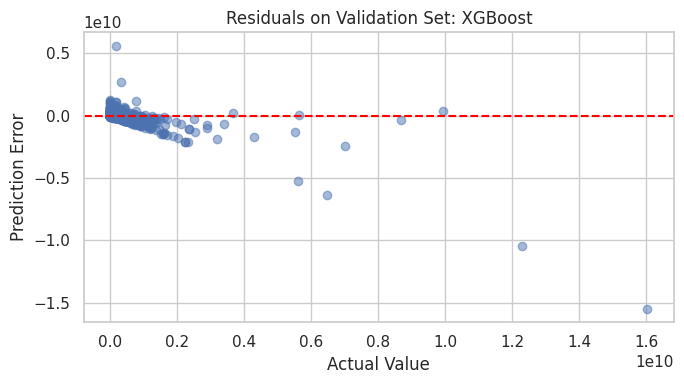

XGBoost
  R²   -> Train: 0.9656, Val: 0.4328
  MAE  -> Train: 11366142.1968, Val: 24275720.7433
  RMSE -> Train: 37450185.3025, Val: 163746935.1071
  Overfit Gap (R²): 0.5329


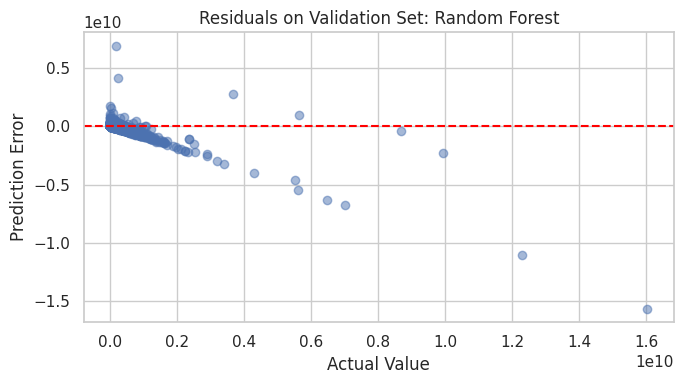

Random Forest
  R²   -> Train: 0.5410, Val: 0.2421
  MAE  -> Train: 24378190.7904, Val: 27659235.2982
  RMSE -> Train: 136850082.6474, Val: 189269412.3991
  Overfit Gap (R²): 0.2989


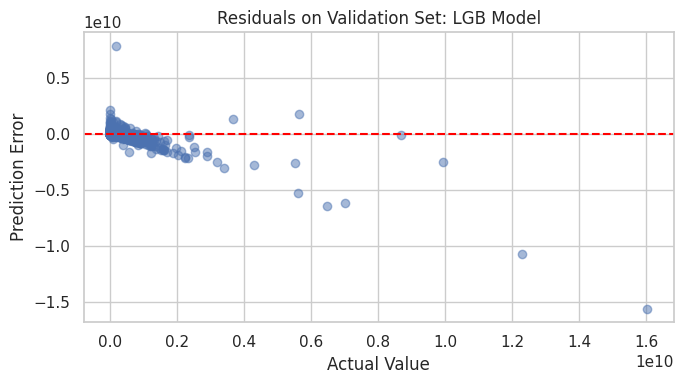

LGB Model
  R²   -> Train: 0.8442, Val: 0.3053
  MAE  -> Train: 18528522.3517, Val: 27239415.9069
  RMSE -> Train: 79723484.9406, Val: 181205931.4735
  Overfit Gap (R²): 0.5389
------------------------ Evaluation Table ------------------------------
        Model  Train R²   Val R²  Overfit Gap     Val RMSE      Val MAE
      XGBoost  0.965630 0.432750     0.532879 1.637469e+08 2.427572e+07
    LGB Model  0.844243 0.305339     0.538903 1.812059e+08 2.723942e+07
Random Forest  0.541049 0.242140     0.298909 1.892694e+08 2.765924e+07
------------------------------------------------------------------------

 Best model is **XGBoost** with Val R² = 0.4328 and Overfit Gap ≈ 0.5329
------------------------------------------------------------------------


In [16]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

##--------- Function to Evaluate Best Models ---------##
def evaluate_model(model, X_train, y_train, X_val, y_val, name="Model"):
    """
    Evaluate a regression model on training and validation data.
    Computes R², MAE, RMSE, and plots residuals.
    Returns a dictionary with evaluation metrics.

    Parameters:
    - model: trained regression model (Ex- pipeline)
    - X_train, y_train: training data
    - X_val, y_val: validation data
    - name: model name for display
    """

    # Predict on both training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Compute evaluation metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    # Residual scatter plot (for validation set)
    residuals = y_val_pred - y_val
    plt.figure(figsize=(7, 4))
    plt.scatter(y_val, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals on Validation Set: {name}")
    plt.xlabel("Actual Value")
    plt.ylabel("Prediction Error")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print evaluation summary
    print(f"{name}")
    print(f"  R²   -> Train: {train_r2:.4f}, Val: {val_r2:.4f}")
    print(f"  MAE  -> Train: {train_mae:.4f}, Val: {val_mae:.4f}")
    print(f"  RMSE -> Train: {train_rmse:.4f}, Val: {val_rmse:.4f}")
    print(f"  Overfit Gap (R²): {train_r2 - val_r2:.4f}")

    # Return results as a dictionary
    return {
        "Model": name,"Train R²": train_r2,"Val R²": val_r2,"Train MAE": train_mae,
        "Val MAE": val_mae,"Train RMSE": train_rmse,"Val RMSE": val_rmse,"Overfit Gap": train_r2 - val_r2
    }
    

# List to hold evaluation results for multiple models
results = []

# Evaluate each model and store the results
results.append(evaluate_model(xgb_pipe, X_train, y_train, X_val, y_val, name="XGBoost"))
results.append(evaluate_model(rf_pipe, X_train, y_train, X_val, y_val, name="Random Forest"))
results.append(evaluate_model(lgb_pipe, X_train, y_train, X_val, y_val, name="LGB Model"))

# Display evaluation results in tabular form
print("------------------------ Evaluation Table ------------------------------")
df_results = pd.DataFrame(results)
cols = ["Model", "Train R²", "Val R²", "Overfit Gap", "Val RMSE", "Val MAE"]
print(df_results[cols].sort_values(by="Val R²", ascending=False).to_string(index=False))
print("------------------------------------------------------------------------")

# Identify the best model based on validation R² score
best_model = df_results.sort_values(by="Val R²", ascending=False).iloc[0]
print(f"\n Best model is **{best_model['Model']}** with Val R² = {best_model['Val R²']:.4f} and Overfit Gap ≈ {best_model['Overfit Gap']:.4f}")
print("------------------------------------------------------------------------")


## **4.2.2 Insights**
------
**XGBoost Dominates but Overfits:**
- **Train R²=0.9658** which is showing excellent fit on training data.
- **Overfit Gap=0.5248** which shows it captures noise or non-generalizable patterns.
- Though **Val R²=0.4409**, Over 55% of the outcome remains **unexplained**, only 45% variace has been captured.

**Random Forest Is the Most Stable:**
- **Train R² = 0.5408**, **Val R² = 0.2413**
- Smallest **Overfit Gap = 0.2994**, suggesting better generalization.

**LightGBM Has a Balanced Profile:**
- **Train R² = 0.8403**, **Val R² = 0.3147**
- Moderate overfit, but decent balance between training and validation.

**MAE vs RMSE Insights:**
- **RMSE >> MAE** for all models → Large errors/outliers impact predictions.
- Indicates the presence of **outliers or heavy-tailed target distribution**.

**Model Bias Indicators:**
- Models like **SVR, MLP** and **Dummy** yield **R² ≈ 0 or negative**.
- Implies they are worse than the mean predictor.

**Conclusions:**:
- Need for **advanced feature engineering**
- Missing key predictive variables (customer type, regional patterns).
- Noise or quality issues in data.
- For XGB, we can apply regularization(`reg_lambda`, `reg_alpha`) and we can use early stopping to reduce overfitting.
- For Randoforest, we can go deper trees or more expressive features as it is likely underfitting.
- For LGB, we can tune `learning_rate`,`num_leaves`,`feature_fraction` to improve generalization.
  

# **5. Milestone 5: Refined Model with Insights** #

## **5.1 Select Final(Best) Model and Fine Tuned for Improved Results** ##

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score

# XGBoost Hyperparameter Search Space
xgb_params = {
    'model__n_estimators': [600,800,1400],            # Number of boosting rounds
    'model__max_depth': [5, 7],                    # Maximum tree depth for base learners
    'model__learning_rate': [0.01, 0.05,0.07],          # Step size shrinkage
    'model__subsample': [0.9],                     # Subsampling of training data
    'model__colsample_bytree': [0.8, 0.9],         # Subsampling of features for each tree

}

# # # Hyperparameter Tuning using RandomizedSearchCV
xgb_model = RandomizedSearchCV(
    xgb_pipe,                                     # Pipeline that includes preprocessing + model
    param_distributions=xgb_params,
    n_iter=40,                                     # Number of parameter combinations to try
    cv=10,                                         # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',        # RMSE as metric (lower is better)
    verbose=0,                                    # Use all CPU cores for parallel processing
    n_jobs=-1                                     # Reproducible
)

# Fit on training data
xgb_model.fit(X_train, y_train)

# Best estimator after tuning
xgb_best = xgb_model.best_estimator_

# Evaluate R² on train and validation sets
train_r2 = r2_score(y_train, xgb_best.predict(X_train))
val_r2   = r2_score(y_val, xgb_best.predict(X_val))
print(f"XGBoost - R² (train): {train_r2:.3f} | R² (val): {val_r2:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


##  **5.2 Save Best Model into Pickle File**  ##

In [ ]:
import pickle

##Save trianed model into best_model.pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

##  **5.3 Submission CSV File**  ##

In [ ]:
import pandas as pd

# Refine and Retrain on Full Data
xgb_best.fit(X_features, target)
final_test_preds = xgb_best.predict(test_data_processed)

# Create Submission DataFrame
submission_df = pd.DataFrame({
    "id": range(len(final_test_preds)),
    "purchaseValue": np.clip(final_test_preds, 0, None)
})

# Save Datframe into Csv File
submission_df.to_csv("submission.csv", index=False)
print("Saved submission.csv")